<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Baseline model</a></span><ul class="toc-item"><li><span><a href="#Definitions" data-toc-modified-id="Definitions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Definitions</a></span></li><li><span><a href="#Create-train---validate-set-on-Train-data" data-toc-modified-id="Create-train---validate-set-on-Train-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create train - validate set on Train data</a></span></li><li><span><a href="#Measure-R2-and-RMSE" data-toc-modified-id="Measure-R2-and-RMSE-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Measure R2 and RMSE</a></span></li><li><span><a href="#Start-performance-tracking-table" data-toc-modified-id="Start-performance-tracking-table-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Start performance tracking table</a></span></li></ul></li><li><span><a href="#Basic-regression-models" data-toc-modified-id="Basic-regression-models-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Basic regression models</a></span><ul class="toc-item"><li><span><a href="#Scale-X-variables" data-toc-modified-id="Scale-X-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Scale X variables</a></span></li><li><span><a href="#Standard-regression-(on-X)" data-toc-modified-id="Standard-regression-(on-X)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Standard regression (on X)</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Ridge regression</a></span></li></ul></li><li><span><a href="#Feature-engineering-(4th-round)" data-toc-modified-id="Feature-engineering-(4th-round)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature engineering (4th round)</a></span><ul class="toc-item"><li><span><a href="#Log/sqrt-sale-price-&amp;-other-variables" data-toc-modified-id="Log/sqrt-sale-price-&amp;-other-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Log/sqrt sale price &amp; other variables</a></span><ul class="toc-item"><li><span><a href="#Standard-regression-(on-X2)" data-toc-modified-id="Standard-regression-(on-X2)-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Standard regression (on X2)</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Ridge regression</a></span></li></ul></li><li><span><a href="#Ordinals" data-toc-modified-id="Ordinals-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ordinals</a></span><ul class="toc-item"><li><span><a href="#Standard-regression-(on-X3)" data-toc-modified-id="Standard-regression-(on-X3)-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Standard regression (on X3)</a></span></li><li><span><a href="#Lasso-regression" data-toc-modified-id="Lasso-regression-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Lasso regression</a></span></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Ridge regression</a></span></li></ul></li><li><span><a href="#Interaction-terms-(on-X4)" data-toc-modified-id="Interaction-terms-(on-X4)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Interaction terms (on X4)</a></span><ul class="toc-item"><li><span><a href="#Standard-regression-(on-X4)" data-toc-modified-id="Standard-regression-(on-X4)-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Standard regression (on X4)</a></span></li></ul></li></ul></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model selection</a></span><ul class="toc-item"><li><span><a href="#Between-Models-5-7-&amp;-Models-8-10" data-toc-modified-id="Between-Models-5-7-&amp;-Models-8-10-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Between Models 5-7 &amp; Models 8-10</a></span></li><li><span><a href="#Between-Model-5,-6-or-7" data-toc-modified-id="Between-Model-5,-6-or-7-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Between Model 5, 6 or 7</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

# Model Selection and Final Round of Feature Engineering

(this notebook was created with the help of Nbextensions' "Table of Contents (2)" and is best viewed / navigated by enabling the extension)

## Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    LassoCV,
    Ridge,
    RidgeCV,
    ElasticNet,
    ElasticNetCV
)

from sklearn.metrics import (
    r2_score,
    mean_squared_error
)

## Baseline model

### Definitions
Just to avoid confusion, I shall call "df_test" which is derived from Kaggle's test.csv file as the __"Kaggle competition set"__ from now on, instead of calling it the test set like i did above.

The "df_train" dataframe which is derived from Kaggle's train.csv file will be split into two data sets according to a 75/25 split, and I will call former __"train set"__ and latter __"test set"__ (which is actually the validation set).

### Create train - validate set on Train data 

In [2]:
# Read cleaned dataframes from Part 1 

df_train = pd.read_csv("../datasets/df_train.csv")
df_test = pd.read_csv("../datasets/df_test.csv")

In [3]:
# Train-test-split on df_train

y = df_train.saleprice
X = df_train.drop(columns = ["saleprice"])

# Set random seed = 42 so that TAs can match written results to their code run
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [4]:
# Check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1534, 59), (512, 59), (1534,), (512,))

### Measure R2 and RMSE

My baseline model is to use the mean of sale prices in the train set as the predictor of sale prices in the test set. I shall use R-squared value ("R2) and Root Mean Squared Error ("RMSE") as performance metrics.

In [5]:
# Baseline predictor 
y_pred = np.mean(y_train)
y_pred

181590.759452412

In [6]:
# R2 and RMSE of baseline model on train set and test set
print(f"The R2 value for baseline model on train set is \
    {r2_score(y_train, [y_pred] * len(y_train)):.2f}.")
print(f"The RMSE value for baseline model on train set is \
    {np.sqrt(mean_squared_error(y_train, [y_pred] * len(y_train))):.0f}.")

print(f"The R2 value for baseline model on train set is \
    {r2_score(y_test, [y_pred] * len(y_test)):.5f}.")
print(f"The RMSE value for baseline model on train set is \
    {np.sqrt(mean_squared_error(y_test, [y_pred] * len(y_test))):.0f}.")

The R2 value for baseline model on train set is     0.00.
The RMSE value for baseline model on train set is     78017.
The R2 value for baseline model on train set is     -0.00017.
The RMSE value for baseline model on train set is     82756.


Since predicted value of y is the average of all y-values in the Train set, the R2 score on train set will be 0 by definition, as the sum of squares of residuals will be exactly equal to the total sum of squares since I have set $\hat{y}_{i} =  \bar {y}$.

> $ R2 = 1 - (\displaystyle SS_{\text{res}} / \displaystyle SS_{\text{tot}})$, where

> $\displaystyle SS_{\text{res}} =\sum _{i}(y_{i}-\hat{y}_{i})^{2} $

> $\displaystyle SS_{\text{tot}} =\sum _{i}(y_{i}-{\bar {y}})^{2} $

As $\displaystyle SS_{\text{res}} = \displaystyle SS_{\text{tot}}$, it means I did not manage to explain any of the variation in $y_{i}$ at all, so R2 should be rightfully zero.

The fact that R2 on test set is slightly negative means that using the train's set mean as predictor of test set's sale prices is even worse.

The RMSE value on the train set is 78,017 while the RMSE value on train set is higher at 82,756. This means that the predictor (which is derived on train set's data) works worse on the test set, which is to be expected.

In [7]:
# Kaggle submission
sub_reg = pd.read_csv("../datasets/sample_sub_reg.csv")
sub_reg['SalePrice'] = np.mean(y)
sub_reg.to_csv('../datasets/model_1.csv', index = False)

In [8]:
pd.read_csv("../datasets/model_1.csv").shape

(879, 2)

### Start performance tracking table 


| Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |
|-------|-------------|------------|---------------|-----------|--------------|---------------|
| Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 |

The mean sale price is $181,591. The RMSE is around 80k, which is approximately half the mean sale price, which shows that it is quite a bad predictor.

## Basic regression models

### Scale X variables

As I will be using Lasso and Ridge regression in addition to standard linear regression, I need to scale all my numerical variables that are not dummies so that the regularisation optimiser can make an apples-to-apples comparison between different variables.

In [9]:
# Instantiate StandardScaler
ss = StandardScaler()

# Select non-dummy columns that are numerical
numerical_cols = X_train.max() != 1

# Create X_train scaled variables and merge with dummies
numeric = X_train.loc[: , numerical_cols]
dummy = X_train.loc[: , -numerical_cols]

Z_train = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.fit_transform(numeric), columns = numeric.columns),
    left_index = True,
    right_index = True
)


# Create X_test scaled variables and merge with dummies, 
# but fit on X_train parameters
numeric = X_test.loc[: , numerical_cols]
dummy = X_test.loc[: , -numerical_cols]

Z_test = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.transform(numeric), columns = numeric.columns), #do not use fit_transform
    left_index = True,
    right_index = True
)

# For use on Kaggle competition set, create Z that is fitted and transformed on the full X set
numeric = X.loc[: , numerical_cols]
dummy = X.loc[: , -numerical_cols]

Z = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.fit_transform(numeric), columns = numeric.columns),
    left_index = True,
    right_index = True
)

# Use fitted scaler above to transform Kaggle competition set
numeric = df_test.loc[: , numerical_cols]
dummy = df_test.loc[: , -numerical_cols]

Z_kaggle = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.transform(numeric), columns = numeric.columns), #do not use fit_transform
    left_index = True,
    right_index = True
)

In [10]:
# Set all columns to max to check that scaling and merging work as expected
pd.set_option('max_columns', None)

In [11]:
# Check train set 
Z_train.describe()

,street,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_FeedArt,condition_1_Pos,condition_1_Rail,mas_vnr_type_BrkFace,mas_vnr_type_Stone,foundation,central_air,electrical,functional,paved_drive,sale_type_COD,sale_type_New,sale_type_Others,overall_qual,exter_qual,bsmt_qual,bsmt_exposure,heating_qc,fireplace_qu,garage_finish,lot_frontage_imputed,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,garage_area,wood_deck_sf,open_porch_sf
count,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03,1.534000e+03
mean,0.995437,0.012386,0.003259,0.009778,0.036506,0.014342,0.086701,0.039113,0.065841,0.058670,0.000652,0.001304,0.036506,0.000652,0.013690,0.042373,0.144068,0.009778,0.036506,0.022164,0.059322,0.013038,0.054759,0.047588,0.071708,0.017601,0.022164,0.006519,0.077575,0.017601,0.035854,0.308344,0.083442,0.457627,0.938070,0.914602,0.935463,0.906780,0.032595,0.081486,0.023468,1.840119e-17,1.518415e-16,-3.166379e-16,-1.343269e-16,2.648902e-16,2.647093e-16,-7.360475e-17,-8.370097e-17,-1.232644e-15,2.748634e-15,1.988995e-16,-2.750227e-17,2.313583e-16,-2.167975e-16,-1.406958e-16,1.103393e-16,9.336295e-17,-5.558353e-17
std,0.067419,0.110637,0.057017,0.098433,0.187606,0.118933,0.281489,0.193928,0.248085,0.235083,0.025532,0.036096,0.187606,0.025532,0.116237,0.201504,0.351273,0.098433,0.187606,0.147266,0.236303,0.113473,0.227583,0.212962,0.258088,0.131539,0.147266,0.080502,0.267589,0.131539,0.185987,0.461960,0.276639,0.498364,0.241106,0.279564,0.245787,0.290836,0.177631,0.273670,0.151434,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00,1.000326e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.577182e+00,-2.424022e+00,-3.805202e+00,-1.510202e+00,-3.327464e+00,-9.818799e-01,-1.941301e+00,-2.199037e+00,-3.229367e+00,-1.647298e+00,-5.678163e-01,-9.907238e-01,-2.458489e+00,-2.121712e+00,-2.864278e+00,-2.233265e+00,-7.629063e-01,-7.056910e-01
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-7.710468e-01,-7.151757e-01,-5.381238e-01,-5.820571e

In [12]:
# Check test set
Z_test.describe()

,street,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_FeedArt,condition_1_Pos,condition_1_Rail,mas_vnr_type_BrkFace,mas_vnr_type_Stone,foundation,central_air,electrical,functional,paved_drive,sale_type_COD,sale_type_New,sale_type_Others,overall_qual,exter_qual,bsmt_qual,bsmt_exposure,heating_qc,fireplace_qu,garage_finish,lot_frontage_imputed,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,garage_area,wood_deck_sf,open_porch_sf
count,512.0,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.0,512.000000,512.0,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,1.0,0.005859,0.001953,0.007812,0.039062,0.005859,0.091797,0.021484,0.076172,0.050781,0.003906,0.0,0.025391,0.0,0.005859,0.033203,0.173828,0.003906,0.060547,0.027344,0.060547,0.023438,0.052734,0.027344,0.039062,0.021484,0.027344,0.013672,0.115234,0.023438,0.021484,0.306641,0.072266,0.433594,0.910156,0.898438,0.927734,0.908203,0.025391,0.064453,0.021484,0.026400,-0.094384,-0.019135,-0.001966,-0.117845,-0.034061,-0.065844,-0.019109,-0.066960,-0.073002,-0.014785,-0.010685,0.039603,0.035464,-0.003730,-0.067890,-0.007527,-0.043092
std,0.0,0.076397,0.044194,0.088129,0.193933,0.076397,0.289021,0.145134,0.265532,0.219765,0.062439,0.0,0.157462,0.0,0.076397,0.179342,0.379332,0.062439,0.238731,0.163243,0.238731,0.151436,0.223721,0.163243,0.193933,0.145134,0.163243,0.116238,0.319617,0.151436,0.145134,0.461550,0.259180,0.496055,0.286237,0.302368,0.259180,0.289021,0.157462,0.245799,0.145134,0.991356,1.004104,0.908618,0.985409,1.021509,0.998770,1.015641,0.927375,1.010857,1.013084,0.975620,0.971453,0.995500,1.059188,0.988372,1.027245,1.161024,0.862499
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.577182,-2.424022,-3.805202,-1.510202,-3.327464,-0.981880,-1.941301,-2.199037,-3.329048,-1.647298,-0.567816,-0.990724,-2.458489,-2.428501,-2.864278,-2.233265,-0.762906,-0.705691
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.771047,-0.715176,-0.538124,-0.582057,-1.239376,-0.981880,-0.823450,-0.534649,-0.704114,-1.027011,-0.567816,-0.990724,-0.593250,-0.791592,-1.047155,-0.788534,-0.762906,-0.705691
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

### Standard regression (on X)
The basis model has the following features:
- It is fitted on 1 target variable (sales price) and 28 independent variables
- Because of dummy variables, the baseline house is one that:
    - Has gravel road acces
    - Located in Old Town
    - Normal proximity to external conditions (such as railroad, parks)
    - Masonry veneer that is not brick face or stone
    - Foundation that is not poured concrete
    - Does not have central air conditioning
    - Does not have standar circuit breakers
    - Does not have typical functionality
    - Does not have paved driveway
    - Sale type is not warranty deed
 

In [13]:
# Instantiate model
lr = LinearRegression()

# Fit Model
%timeit lr.fit(X_train, y_train)

2.32 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [14]:
# Cross_val_score (R2) on train set
cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 5,
    scoring = 'r2'
).mean()

0.8898523845246638

In [15]:
# Cross_val_score (RMSE) on train set
cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
).mean()

-25808.458932980408

In [16]:
# R2 on test set
r2_score(y_test, lr.predict(X_test))

0.8934370454637335

In [17]:
# R2 on test set
np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))

27012.566763185274

In [18]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lr.fit(X, y)

# Predict sale prices based on Kaggle competition set
y_pred = lr.predict(df_test)
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_2.csv', index = False)

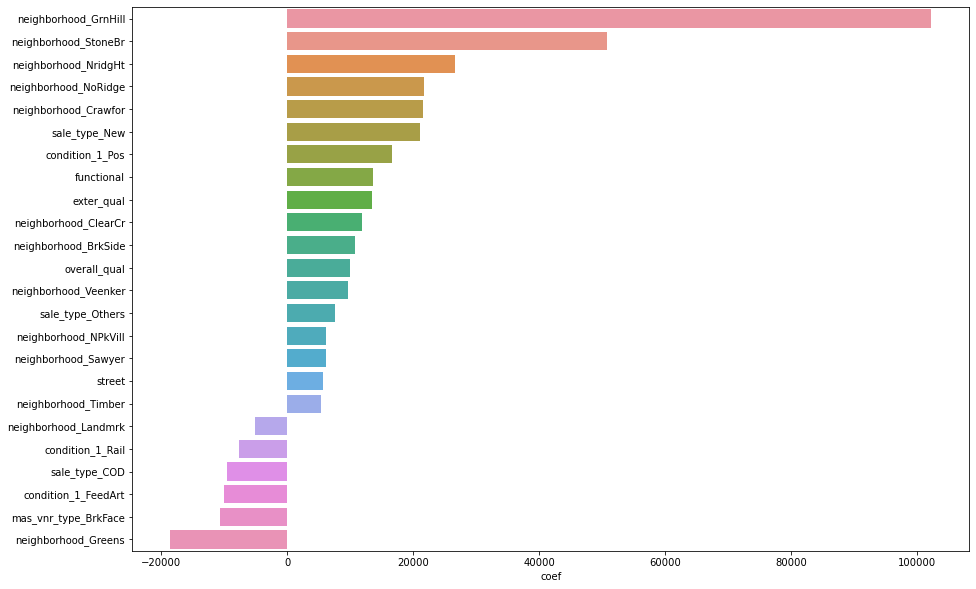

In [19]:
# Plot |coefficients| > 5_000
threshold = 5_000
lr_coef = pd.DataFrame(lr.coef_, index = X.columns, columns = ["coef"])
lr_coef = lr_coef.loc[np.abs(lr_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lr_coef, x = "coef", y = lr_coef.index);

Update performance table

| Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |

__Summary__

As expected, the RMSE of the test set is higher than that of the train set.
We see a marked improvement over the baseline model, where RMSE of the test set dropped from 82,756 to 27,012.
Neighborhoods seem to be the largest predictor of prices, followed by these variables in descending order of importance:
- whether a house is new (sale_type_New)
- whether the house is located near positive externalities such as parks and gardens (condition_1_Pos)
- whether where the house has typical functionalities (functional)	 
- externality quality of house (exter_qual)
- overall quality of house (overall_qual)

### Lasso regression

In [20]:
# Instantiate
lasso = LassoCV(
    n_alphas = 500,
    cv = 5,
    random_state = 42
)

# Fit using scaled variables Z_train
%timeit lasso.fit(Z_train, y_train)

# Show optimal alpha
print(f'The optimal alpha for {lasso} is {lasso.alpha_:.1f}.')

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lasso,
    Z_train,
    y_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The LassoCV's R2 on train set is {cv.mean():.3f}.")

# Cross_val_score (RMSE) on train set
cv = cross_val_score(
    lasso,
    Z_train,
    y_train,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
)
print(f"The LassoCV's RMSE on train set is {cv.mean():.0f}.")

# R2 on test set
print(f'The R2 on test set is {r2_score(y_test, lasso.predict(Z_test)):.3f}.')

# RMSE on test set
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, lasso.predict(Z_test))):.0f}.')

158 ms ± 844 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The optimal alpha for LassoCV(cv=5, n_alphas=500, random_state=42) is 62.7.
The LassoCV's R2 on train set is 0.889.
The LassoCV's RMSE on train set is -25926.
The R2 on test set is 0.893.
The RMSE on test set is 27127.


In [21]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lasso.fit(Z, y)

# Predict sale prices based on Kaggle competition set
y_pred = lasso.predict(Z_kaggle)
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_3.csv', index = False)

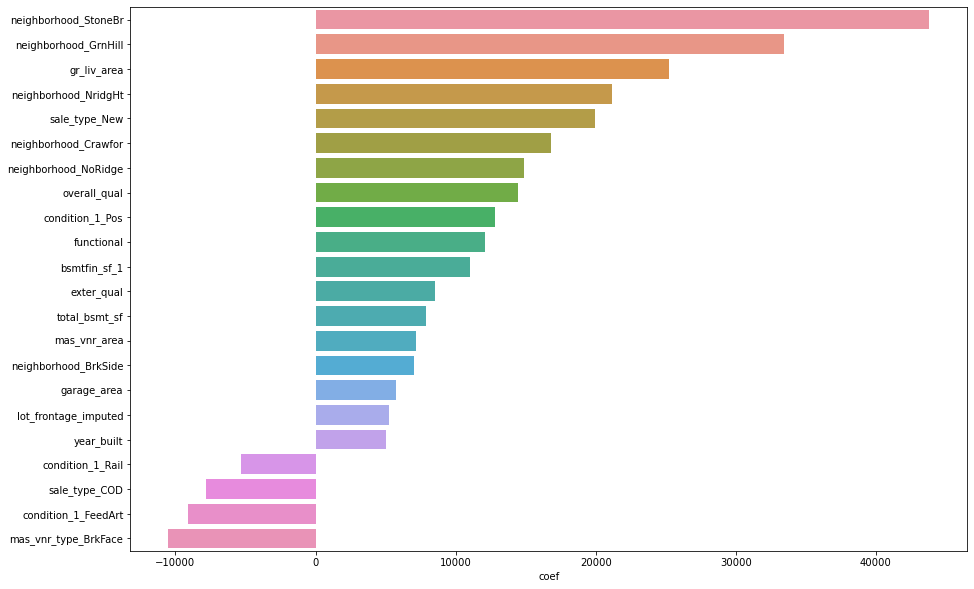

In [22]:
# Plot |coefficients| > 5_000
threshold = 5_000
lasso_coef = pd.DataFrame(lasso.coef_, index = Z.columns, columns = ["coef"])
lasso_coef = lasso_coef.loc[np.abs(lasso_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lasso_coef, x = "coef", y = lasso_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |


Surprisingly, the Lasso regression scores slightly worse off than the standard OLS regression, as the RMSEs for both train and test sets are marginally higher. This is possibly due to the fact that our basic OLS regression is well-specificed, meaning that the variables we use are not superfluous, or that scaling/normalising our X variables to run the Lasso might be inappropriate if the underlying X variables are actually not normal by nature.


Neighborhoods seem to be the largest predictor of prices like standard OLS (Model 2), but the next few important variables are quite different from Model 2's, in decreasing order of importance (those in italics are new):
- _gross living area (gr_liv_area)_
- whether a house is new (sale_type_New)
- ~whether the house is located near positive externalities such as parks and gardens (condition_1_Pos)~
- ~whether where the house has typical functionalities (functional)~
- ~externality quality of house (exter_qual)~
- overall quality of house (overall_qual)
- whether the house is located near positive externalities such as parks and gardens (condition_1_Pos)
- whether where the house has typical functionalities (functional)
- _basement finished square feet (bsmtfin_sf_1)_
- externality quality of house (exter_qual)

### Ridge regression

In [23]:
# Instantiate
ridge = RidgeCV(
    alphas = np.logspace(-3,3,100),
    cv = 5
)

# Fit using scaled variables Z_train
%timeit ridge.fit(Z_train, y_train)

# Show optimal alpha
print(f'The optimal alpha for {ridge} is {ridge.alpha_:.3f}.')

# Cross_val_score (R2) on train set
cv = cross_val_score(
    ridge,
    Z_train,
    y_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The RidgeCV's R2 on train set is {cv.mean():.3f}.")

# Cross_val_score (RMSE) on train set
cv = cross_val_score(
    ridge,
    Z_train,
    y_train,
    cv = 5,
    scoring = 'neg_root_mean_squared_error'
)
print(f"The RidgeCV's RMSE on train set is {cv.mean():.0f}.")

# R2 on test set
print(f'The R2 on test set is {r2_score(y_test, ridge.predict(Z_test)):.3f}.')

# RMSE on test set
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, ridge.predict(Z_test))):.0f}.')

1.33 s ± 19.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The optimal alpha for RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5) is 0.132.
The RidgeCV's R2 on train set is 0.889.
The Ridg

In [24]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
ridge.fit(Z, y)

# Predict sale prices based on Kaggle competition set
y_pred = ridge.predict(Z_kaggle)
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_4.csv', index = False)

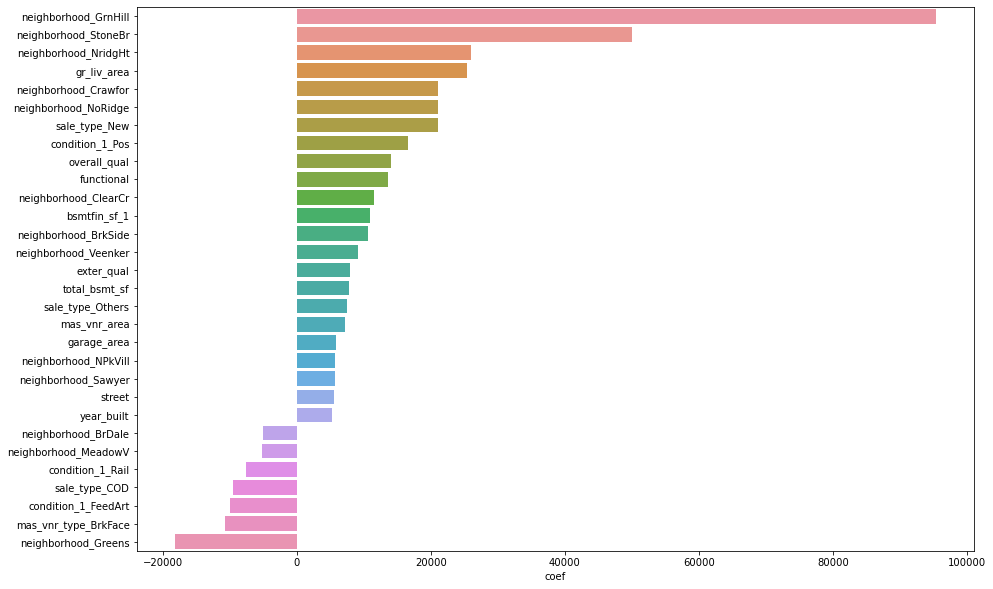

In [25]:
# Plot |coefficients| > 5_000
threshold = 5_000
ridge_coef = pd.DataFrame(ridge.coef_, index = Z.columns, columns = ["coef"])
ridge_coef = ridge_coef.loc[np.abs(ridge_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = ridge_coef, x = "coef", y = ridge_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |




Ridge regression scores marginally worse than standard OLS in the train set, and marginally better than standard OLS in the test set. The fact that the optimal alpha is a small value of 0.132 also means that the coefficients from the standard OLS do not need much compression, i.e. they could already be significant. 

The variables of importance are quite similar to that of Lasso regression's, with one reordering between condition_1_Pos and overall_qual:
- gross living area (gr_liv_area)
- whether a house is new (sale_type_New)
- ~overall quality of house (overall_qual)~
- whether the house is located near positive externalities such as parks and gardens (condition_1_Pos)
- overall quality of house (overall_qual)
- whether where the house has typical functionalities (functional)
- basement finished square feet (bsmtfin_sf_1)
- externality quality of house (exter_qual)

## Feature engineering (4th round)

### Log/sqrt sale price & other variables
I am a bit puzzled by the negligible improvements of Lasso and Ridge over the standard OLS. One difference between Models 3 and 4 versus Model 2 is the scaling of X variables that are non-dummies. Perhaps scaling does not work as well if the distributions are skewed, as you might be deducting an overly-large mean or dividing by an overly-large stdev from the datapoint if the distribution is very right-skewed.
I shall transform some variables to see if this improves model performance.

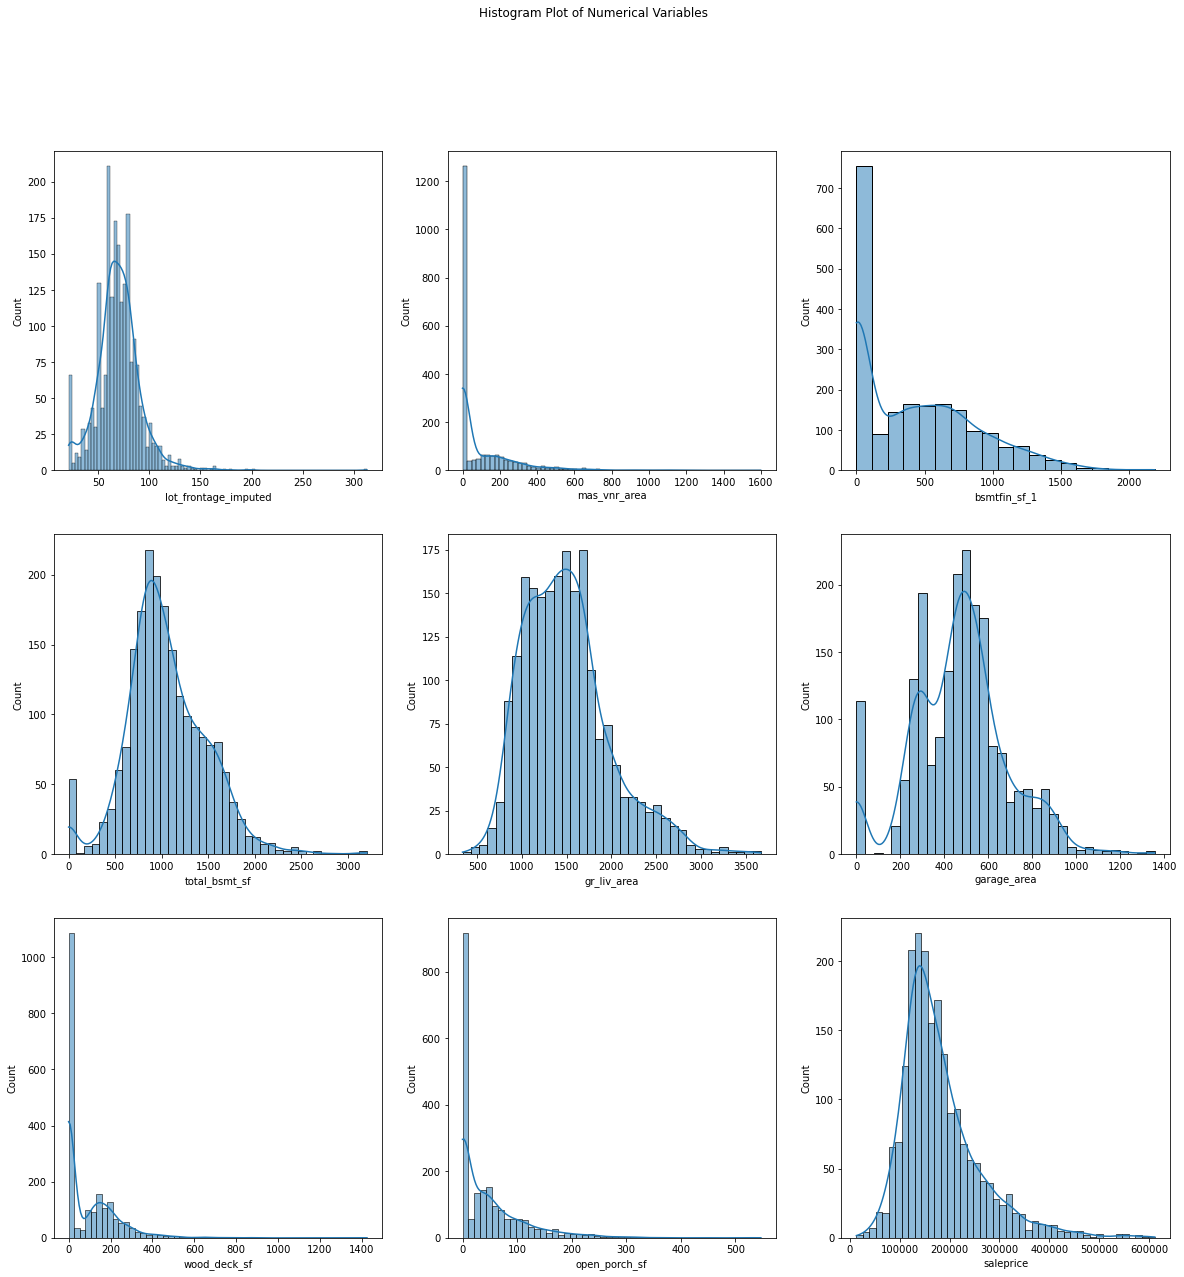

In [26]:
# Looks at numerical columns again
to_check = ['lot_frontage_imputed', 'mas_vnr_area', 'bsmtfin_sf_1', 'total_bsmt_sf', 'gr_liv_area', 
 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'saleprice']

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

fig.suptitle('Histogram Plot of Numerical Variables')

for i, axes in zip(to_check, axes.flat):
    sns.histplot(
        ax=axes, 
        data = df_train, 
        x = i, 
        kde = True
    )

It looks like the variables have a right-skewed distribution, some worse than the others, e.g. mas_vnr_area, bsmtfin_sf_1, wood_deck_sf, saleprice.
So it might be better to transform them using natural log or square root so that the resulting plot is more linear in nature and more suitable for a linear regression.

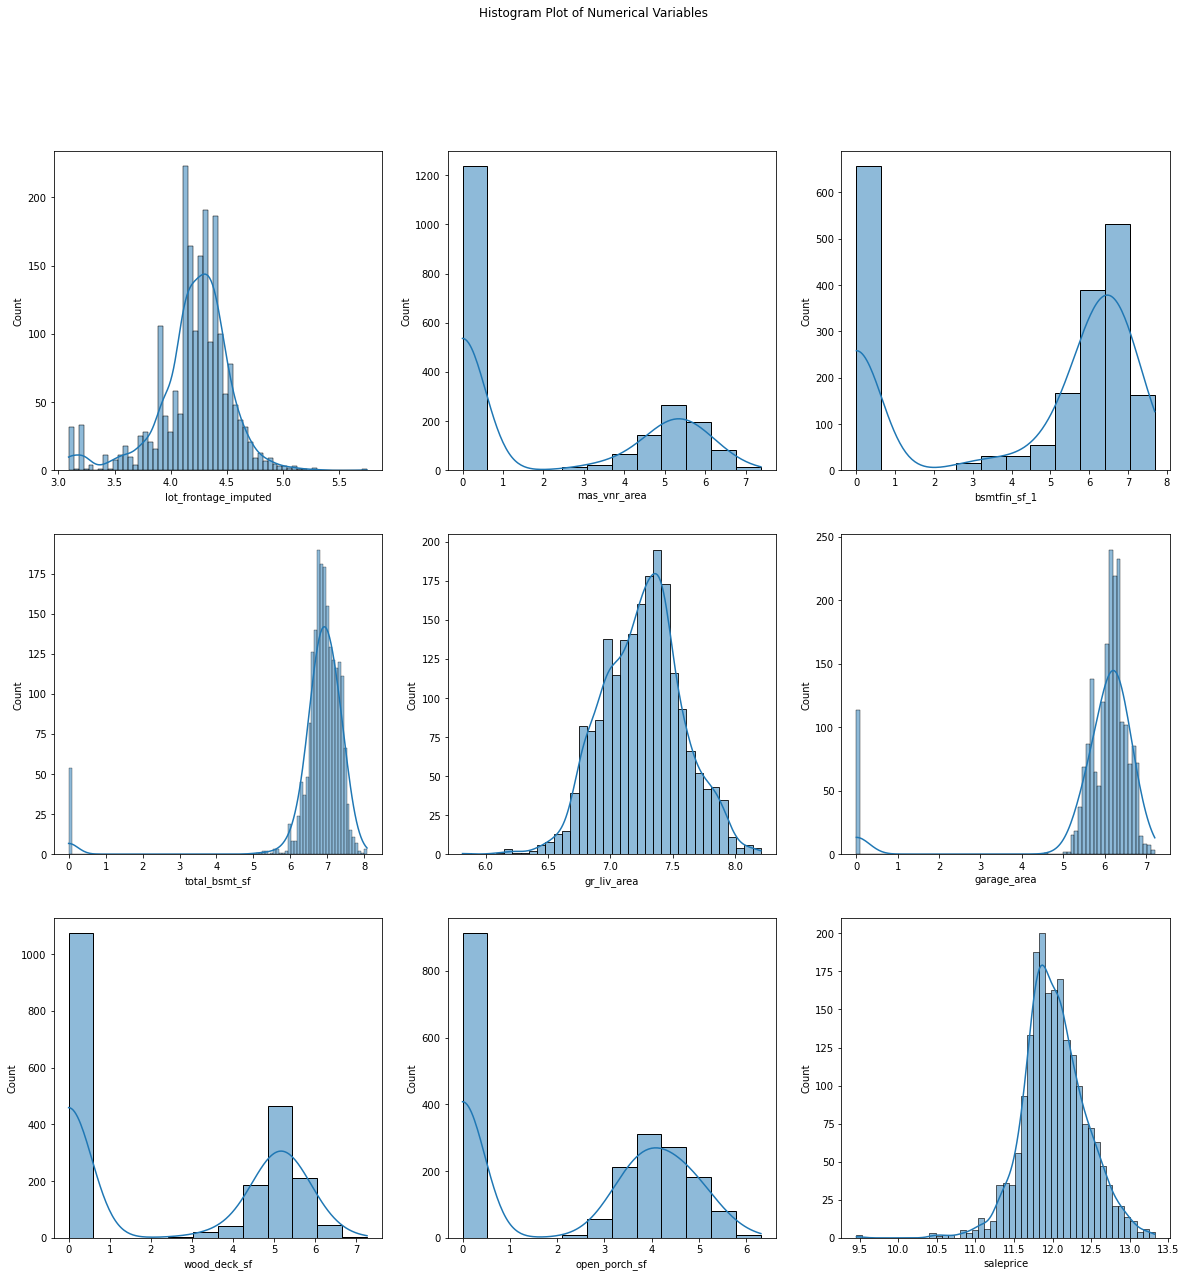

In [27]:
# Plot with X variables transformed by natural log

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

fig.suptitle('Histogram Plot of Numerical Variables')

for i, axes in zip(to_check, axes.flat):
    sns.histplot(
        ax=axes, 
        data = df_train[to_check].apply(lambda x: np.log(x+1)), 
        x = i, 
        kde = True
    )

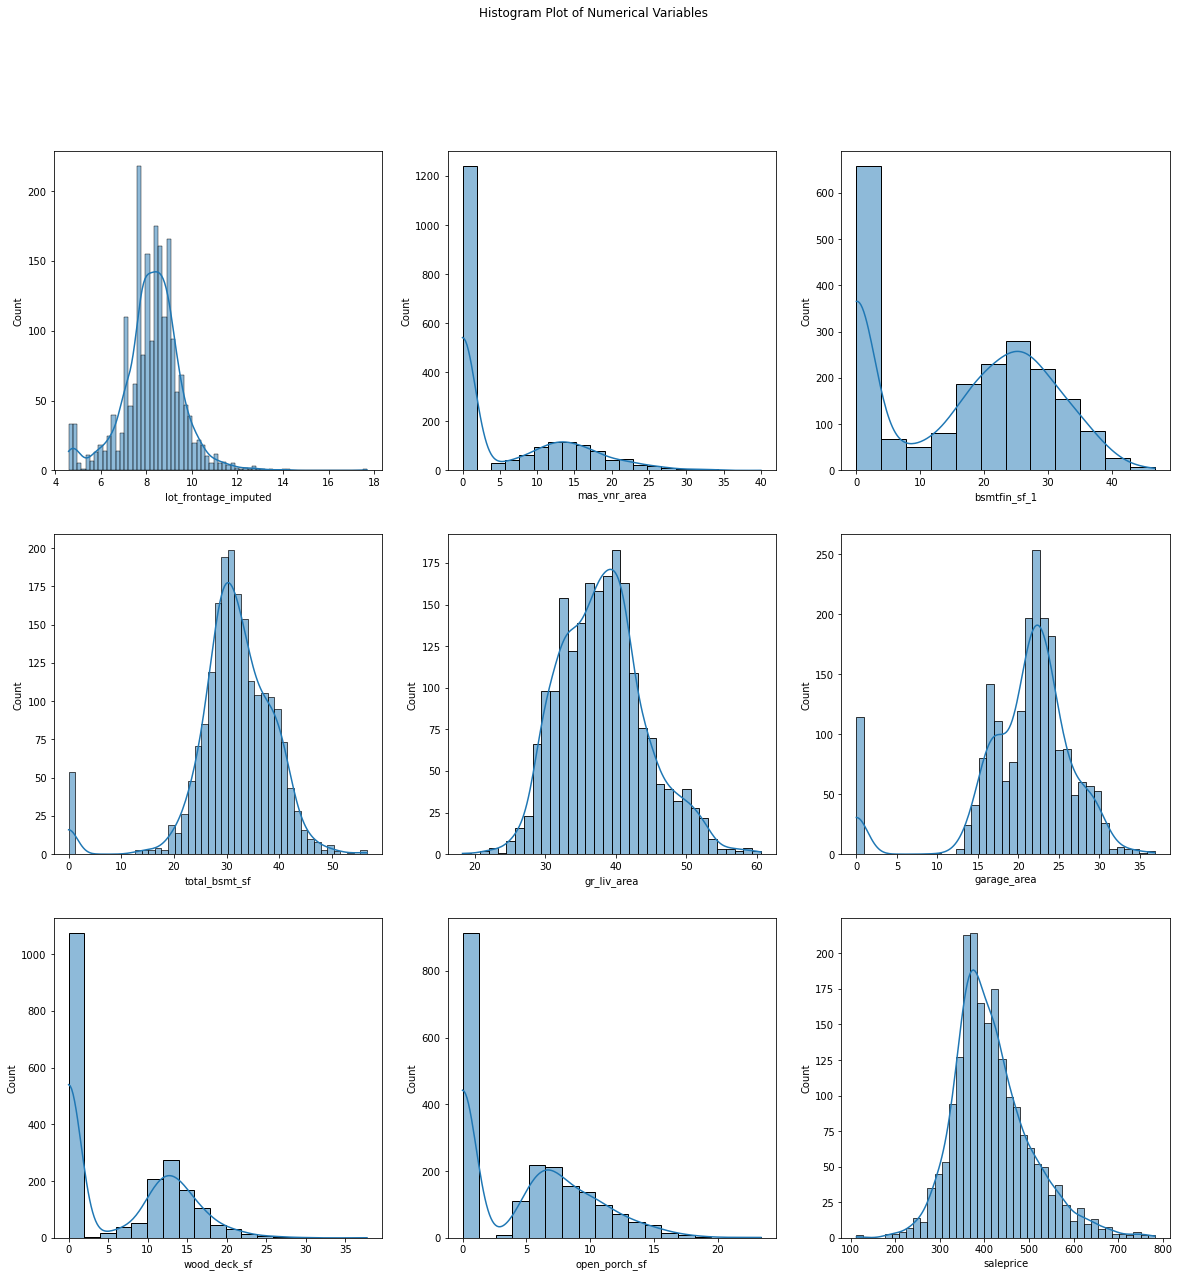

In [28]:
# Plot with X variables transformed by square root

fig, axes = plt.subplots(3, 3, figsize=(20, 20))

fig.suptitle('Histogram Plot of Numerical Variables')

for i, axes in zip(to_check, axes.flat):
    sns.histplot(
        ax=axes, 
        data = df_train[to_check].apply(lambda x: np.sqrt(x)), 
        x = i, 
        kde = True
    )

Using eye power, it seems like applying np.log and np.sqrt make all the 9 distributions "look" more like a normal distribution, but some transformations seem to work better for some variables (e.g. sqrt did not work for open_porch_sf, log is better; log did not work for bsmtfin_sf_1, sqrt works better). 

Here are my selected transformations for continuous variables

| Variable | Transformation | 
|----------|----------------|
| lot_frontage_imputed | Natural Log |
| mas_vnr_area | Natural Log  |
| bsmtfin_sf_1 | Square Root |
| total_bsmt_sf | Square Root |
| gr_liv_area | Natural Log |
| garage_area | Square Root |
| wood_deck_sf | Natural Log |
| open_porch_sf | Natural Log |
| saleprice | Natural Log |




In [29]:
# Transform time!
to_log = ['lot_frontage_imputed', 'mas_vnr_area', 'gr_liv_area', 'wood_deck_sf', 'open_porch_sf']
to_sqrt = ['bsmtfin_sf_1', 'total_bsmt_sf', 'garage_area']

# Create transformer function
def transform_log_sqrt(data):
    for _ in data.columns:
        if _ in to_log:
            data[_] = data[_].map(lambda x: np.log(x+1))
        if _ in to_sqrt:
            data[_] = data[_].map(lambda x: np.sqrt(x))

y2 = df_train.saleprice
X2 = df_train.drop(columns = ["saleprice"])
            
# Train-test-split for new set of transformed variables
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42)
            
transform_log_sqrt(X2_train)
transform_log_sqrt(X2_test)


## Transform full set to use for Kaggle training and submission
transform_log_sqrt(X2) # for fitting model to do Kaggle prediction
X2_kaggle = df_test 
transform_log_sqrt(X2_kaggle) # transform Kaggle competition set for prediction

<ipython-input-29-89de08ca0eb9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[_] = data[_].map(lambda x: np.log(x+1))
<ipython-input-29-89de08ca0eb9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[_] = data[_].map(lambda x: np.sqrt(x))


In [30]:
# Need to transform y_test and y_train too
y2_train = np.log(y2_train)
y2_test = np.log(y2_test)
y2 = np.log(y2)

In [31]:
# Check
display(X_train[to_log])
display(X2_train[to_log])
display(y_test)
display(y2_test)

,lot_frontage_imputed,mas_vnr_area,gr_liv_area,wood_deck_sf,open_porch_sf
757,72.660672,0.0,1217,168,27
250,87.028987,466.0,2501,192,87
413,60.000000,0.0,1489,335,0
1335,52.000000,0.0,1322,0,0
310,81.372274,240.0,1786,182,35
...,...,...,...,...,...
1130,75.000000,0.0,2454,0,148
1294,75.000000,0.0,1335,0,210
860,63.000000,210.0,1500,192,36
1459,24.000000,0.0,1045,180,0


,lot_frontage_imputed,mas_vnr_area,gr_liv_area,wood_deck_sf,open_porch_sf
757,4.299469,0.000000,7.104965,5.129899,3.332205
250,4.477666,6.146329,7.824846,5.262690,4.477337
413,4.110874,0.000000,7.306531,5.817111,0.000000
1335,3.970292,0.000000,7.187657,0.000000,0.000000
310,4.411249,5.484797,7.488294,5.209486,3.583519
...,...,...,...,...,...
1130,4.330733,0.000000,7.805882,0.000000,5.003946
1294,4.330733,0.000000,7.197435,0.000000,5.351858
860,4.158883,5.351858,7.313887,5.262690,3.610918
1459,3.218876,0.000000,6.952729,5.198497,0.000000


305     120000
1283    116000
368     155000
479     441929
1538    402000
         ...  
1344    140000
817     132000
706     180000
415     219000
273     129000
Name: saleprice, Length: 512, dtype: int64

305     11.695247
1283    11.661345
368     11.951180
479     12.998905
1538    12.904207
          ...    
1344    11.849398
817     11.790557
706     12.100712
415     12.296827
273     11.767568
Name: saleprice, Length: 512, dtype: float64

In [32]:
# Apply standard scaler in order to fit Lasso and Ridge regressions later

# Create X_train scaled variables and merge with dummies
numeric = X2_train.loc[: , numerical_cols]
dummy = X2_train.loc[: , -numerical_cols]

Z2_train = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.fit_transform(numeric), columns = numeric.columns),
    left_index = True,
    right_index = True
)


# Create X_test scaled variables and merge with dummies, 
# but fit on X_train parameters
numeric = X2_test.loc[: , numerical_cols]
dummy = X2_test.loc[: , -numerical_cols]

Z2_test = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.transform(numeric), columns = numeric.columns), # do not use fit_transform
    left_index = True,
    right_index = True
)




## For use on Kaggle competition set, create Z that is fitted and transformed on the full X set
numeric = X2.loc[: , numerical_cols]
dummy = X2.loc[: , -numerical_cols]

Z2 = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.fit_transform(numeric), columns = numeric.columns),
    left_index = True,
    right_index = True
)

# Use fitted scaler above to transform Kaggle competition set
numeric = X2_kaggle.loc[: , numerical_cols]
dummy = X2_kaggle.loc[: , -numerical_cols]

Z2_kaggle = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.transform(numeric), columns = numeric.columns), # do not use fit_transform
    left_index = True,
    right_index = True
)

In [33]:
# Check
display(Z2_train)
display(X2_train)

,street,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_FeedArt,condition_1_Pos,condition_1_Rail,mas_vnr_type_BrkFace,mas_vnr_type_Stone,foundation,central_air,electrical,functional,paved_drive,sale_type_COD,sale_type_New,sale_type_Others,overall_qual,exter_qual,bsmt_qual,bsmt_exposure,heating_qc,fireplace_qu,garage_finish,lot_frontage_imputed,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,garage_area,wood_deck_sf,open_porch_sf
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0.632021,-0.715176,0.550902,1.274233,0.848711,-0.981880,-0.823450,0.268283,0.591740,0.308993,-0.795419,0.640283,0.386554,-0.490785,0.769967,0.222820,1.024641,0.461009
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,1.333554,0.993671,0.550902,1.274233,0.848711,0.678154,0.294402,0.804600,0.757875,0.499850,1.563671,-1.236189,0.484052,1.813600,0.769967,1.032691,1.075874,0.992579
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,-0.069513,-0.715176,-0.538124,-0.582057,-1.239376,1.231498,-0.823450,-0.299328,-1.069611,-1.647298,-0.795419,-1.236189,-0.440954,0.154441,0.769967,-0.854955,1.289781,-1.085799
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,-0.771047,-0.715176,-0.538124,-0.582057,0.848711,-0.981880,-0.823450,-0.722434,-1.102838,-1.551869,-0.795419,-0.710241,-0.688863,-0.226083,-1.047155,-0.658264,-0.954573,-1.085799
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,1.333554,0.993671,1.639929,2.202378,0.848711,1.231498,0.294402,0.604705,0.990464,0.881566,1.309761,1.740954,1.355561,0.736274,0.769967,0.927331,1.055347,0.577669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0.632021,-0.715176,-0.538124,-0.582057,-1.239376,1.231498,-0.823450,0.362379,-3.096459,0.118135,-0.795419,-1.236189,-0.349638,1.752896,0.769967,0.493233,-0.954573,1.237031
1530,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0.632021,0.993671,0.550902,-0.582057,0.848711,-0.981880,0.294402,0.362379,1.123372,1.072423,-0.795419,-1.236189,0.647123,-0.194783,0.769967,0.489930,-0.954573,1.398532
1531,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0.632021,0.993671,0.550902,1.274233,0.848711,-0.981880,0.294402,-0.154835,1.056918,0.929280,1.258736,-0.896691,0.923036,0.177986,0.769967,0.473373,1.075874,0.590388
1532,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,-0.069513,-0.715176,0.550902,-0.582057,-0.195333,0.678154,-0.823450,-2.983956,0.259470,-0.215866,-0.795419,0.142856,-1.092545,-0.978105,-1.047155,0.096161,1.051107,-1.085799


,street,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_FeedArt,condition_1_Pos,condition_1_Rail,overall_qual,mas_vnr_type_BrkFace,mas_vnr_type_Stone,exter_qual,foundation,bsmt_qual,bsmt_exposure,heating_qc,central_air,electrical,functional,fireplace_qu,garage_finish,paved_drive,sale_type_COD,sale_type_New,sale_type_Others,lot_frontage_imputed,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,gr_liv_area,full_bath,garage_area,wood_deck_sf,open_porch_sf
757,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,1,1,4,3,4,1,1,1,0,1,1,0,0,0,4.299469,1990,1991,0.000000,24.718414,34.467376,7.104965,2,22.293497,5.129899,3.332205
250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,1,0,2,1,4,3,4,1,1,1,3,2,1,0,0,0,4.477666,1995,1995,6.146329,0.000000,35.242020,7.824846,2,27.404379,5.262690,4.477337
413,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,1,0,3,1,2,1,1,1,4,1,1,0,0,0,4.110874,1940,1950,0.000000,0.000000,27.892651,7.306531,2,15.491933,5.817111,0.000000
1335,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,1,0,3,1,4,1,1,1,0,1,1,0,0,0,3.970292,1939,1952,0.000000,6.928203,25.922963,7.187657,1,16.733201,0.000000,0.000000
310,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,2,1,5,4,4,1,1,1,4,2,1,0,0,0,4.411249,2002,2003,5.484797,39.217343,42.166337,7.488294,2,26.739484,5.209486,3.583519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,1,1,3,1,2,1,0,1,4,1,0,0,0,0,4.330733,1879,1987,0.000000,0.000000,28.618176,7.805882,2,24.000000,0.000000,5.003946
1294,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,0,0,2,1,4,1,4,1,1,1,0,2,1,0,1,0,4.330733,2006,2007,0.000000,0.000000,36.537652,7.197435,2,23.979158,0.000000,5.351858
860,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,0,2,1,4,3,4,1,1,1,0,2,1,0,0,0,4.158883,2004,2004,5.351858,4.472136,38.729833,7.313887,2,23.874673,5.262690,3.610918
1459,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,4,1,3,1,1,1,3,1,1,0,0,0,3.218876,1980,1980,0.000000,18.165902,22.715633,6.952729,1,21.494185,5.198497,0.000000


#### Standard regression (on X2)

In [34]:
# Instantiate model
lr = LinearRegression()

# Fit Model
%timeit lr.fit(X2_train, y2_train)

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lr,
    X2_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The standard regression's R2 on train set is {cv.mean():.3f}.")

# # Cross_val_score (RMSE) on train set
# cv = cross_val_score(
#     lr,
#     X_train2,
#     y_train2,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error'
# )
# print(f"The standard regression's RMSE on train set is {cv.mean():.0f}.")

# Cross_val_score can only calculate the RMSE on the transformed log-price, which gives
# a very miniscule RMSE since logs are small numbers. 
# No choice, use standard RMSE calculation on the entire train set
y_pred = np.exp(lr.predict(X2_train)) -1
print(f"The standard regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lr.predict(X2_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
# Remember to re-transform the predicted log(prices) back to normal prices
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

2.46 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The standard regression's R2 on train set is 0.890.
The standard regression's RMSE on train set is 22219.
The R2 on test set is 0.916.
The RMSE on test set is 23963.


In [35]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lr.fit(X2, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(lr.predict(X2_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_5.csv', index = False)

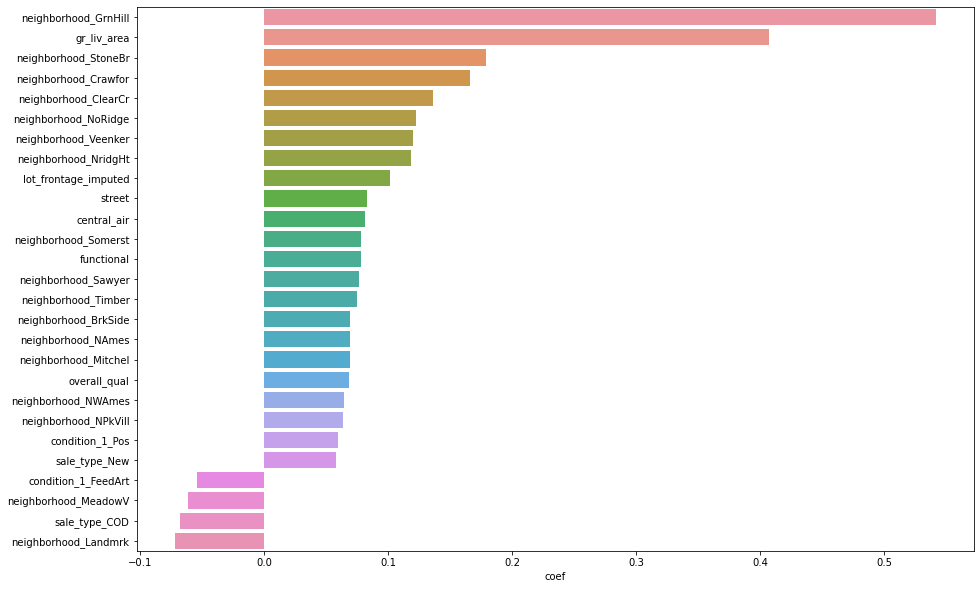

In [36]:
# Plot |coefficients| > 0.05
threshold = 0.05
lr_coef = pd.DataFrame(lr.coef_, index = X2.columns, columns = ["coef"])
lr_coef = lr_coef.loc[np.abs(lr_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lr_coef, x = "coef", y = lr_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |




Shows a marked improvement over Models 2-4 in the test and train sets. This means that the continuous variables, after transformation, exhibit a more linear relationship with house sale prices (which was also transformed).

For Kaggle competition set, Model 5 performs better Models 2 and 4, but is worse than Model 3. This might be a fluke, as Kaggle's competition set might be suitable for Lasso by chance.

#### Lasso regression

In [37]:
# Instantiate
lasso = LassoCV(
    n_alphas = 500,
    cv = 5,
    random_state = 42
)

# Fit using scaled variables Z_train
%timeit lasso.fit(Z2_train, y2_train)

# Show optimal alpha
print(f'The optimal alpha for {lasso} is {lasso.alpha_:.5f}.')

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lasso,
    Z2_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The LassoCV's R2 on train set is {cv.mean():.3f}.")

# # Cross_val_score (RMSE) on train set
# cv = cross_val_score(
#     lasso,
#     Z_train2,
#     y_train2,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error'
# )
# print(f"The LassoCV's RMSE on train set is {cv.mean():.0f}.")

# Calc RMSE on train set
y_pred = np.exp(lasso.predict(Z2_train)) -1
print(f"The Lasso regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lasso.predict(Z2_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

183 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The optimal alpha for LassoCV(cv=5, n_alphas=500, random_state=42) is 0.00034.
The LassoCV's R2 on train set is 0.888.
The Lasso regression's RMSE on train set is 22445.
The R2 on test set is 0.916.
The RMSE on test set is 23941.


In [38]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lasso.fit(Z2, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(lasso.predict(Z2_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_6.csv', index = False)

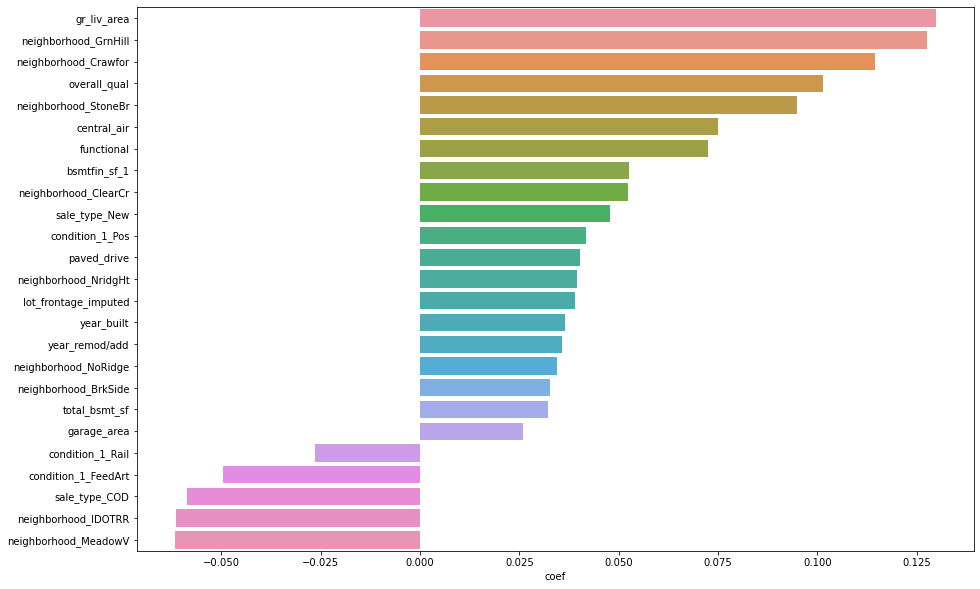

In [39]:
# Plot |coefficients| > 0.025
threshold = 0.025
lasso_coef = pd.DataFrame(lasso.coef_, index = Z2.columns, columns = ["coef"])
lasso_coef = lasso_coef.loc[np.abs(lasso_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lasso_coef, x = "coef", y = lasso_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |

Lasso (Model 6) shows a slight improvement over standard (Model 5) on the test set. The optimal alpha selected by cross_val_score is 0.000034, which is much lower than the alpha of 62.7 selected for Model 2. This is probably not an error, if the Lasso think that Model 5 can't be optimised further.

Interestingly, gross living area (gr_liv_area) is now the largest predictor of house prices, instead of neighborhoods. These are the top ranked variables, in descreasing order of importance:
- gross living area (gr_liv_area)
- "good" neighborhoods such as GmHill and Crawfor
- overall quality of house (overall_qual)

#### Ridge regression

In [40]:
# Instantiate
ridge = RidgeCV(
    alphas = np.logspace(-3,3,100),
    cv = 5
)

# Fit using scaled variables Z_train
%timeit ridge.fit(Z2_train, y2_train)

# Show optimal alpha
print(f'The optimal alpha for {ridge} is {ridge.alpha_:.3f}.')

# Cross_val_score (R2) on train set
cv = cross_val_score(
    ridge,
    Z2_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The RidgeCV's R2 on train set is {cv.mean():.3f}.")


# Calc RMSE on train set, since the cross_val_score output on log-saleprice can't be tweaked to reflect exp(log-saleprice)
y_pred = np.exp(ridge.predict(Z2_train)) -1
print(f"The Ridge regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(ridge.predict(Z2_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

1.61 s ± 37.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The optimal alpha for RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5) is 0.152.
The RidgeCV's R2 on train set is 0.890.
The Ridg

In [41]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
ridge.fit(Z2, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(ridge.predict(Z2_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_7.csv', index = False)

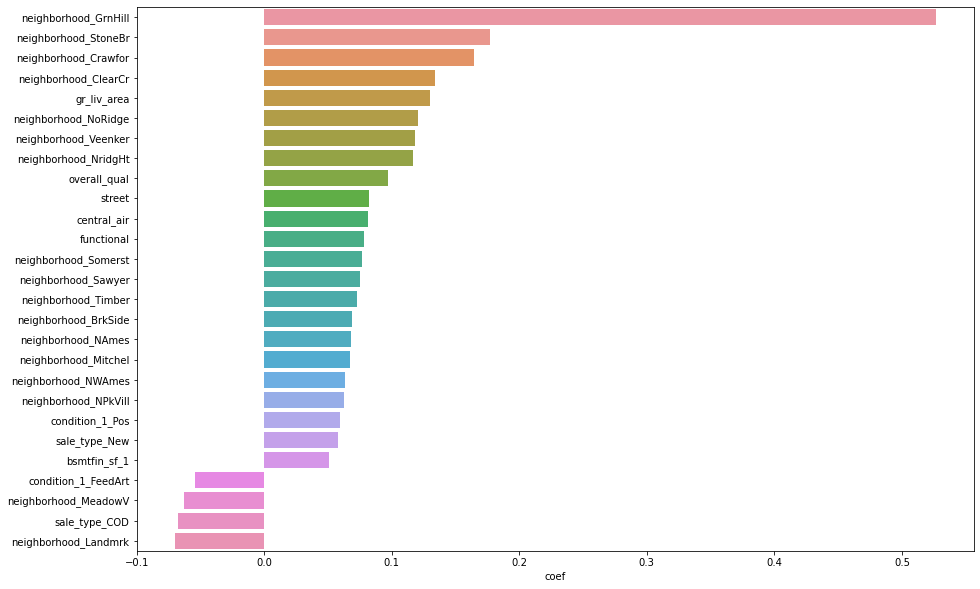

In [42]:
# Plot |coefficients| > 0.05
threshold = 0.05
ridge_coef = pd.DataFrame(ridge.coef_, index = Z2.columns, columns = ["coef"])
ridge_coef = ridge_coef.loc[np.abs(ridge_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = ridge_coef, x = "coef", y = ridge_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 0.89 | 22,221 | 0.92 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |

Ridge overperforms Lasso in the train set, but slightly underperforms Lasso in test and Kaggle competition sets. It also takes much longer than Lasso to run. At this moment, Model 6 is in the running for best candidate...

### Ordinals
In Models 2-6, ordinal variables are given discrete integers as values, in increasing order of desirability or quality. Assigning an arbitrary "0-1-2-3" scale to "poor-average-good-excellent" make a strong assumption that there is an equal distance or difference between the various qualities, which may not be true in real life. 
If our assumption is wrong, it is better to perform one-hot encoding on these variables. We let the model assume and fit a natural ordering between the categories of quality, but the disadvantage is that it may result in poor performance or unexpected results (e.g. if the data set is not large or robust enough, a fitted model may assume "excellent" is worse than "good". In such cases, telling the model what the natural ordered relationship should be will allow the learning algorithm to harness this relationship more efficiently.

I shall perform one-hot encoding on our ordinal variables to test this assumption.

__FROM DATA DICTIONARY__

| No. | Feature | DType |  Description | Remarks |
|-----|---------|------|-------------|---------|
| 5 | overall_qual | integer | Rates the overall material and finish of the house | 1 (very poor) to 10 (very excellent) |
| 7 | exter_qual | integer | Evaluates the quality of the material on the exterior | 0 (fair) to 3 (excellent) |
| 9 | bsmt_qual | integer | Evaluates the height of the basement | 0 (none) to 5 (excellent) | **
| 10 | bsmt_exposure | integer | Refers to walkout or garden level walls | 0 (none) to 4 (good exposure) |
| 11 | heating_qc | integer | Heating quality and condition | 0 (poor) to 4 (excellent) |
| 15 | fireplace_qu | integer | Fireplace quality | 0 (none) to 5 (excellent) | 
| 16 | garage_finish | integer | Interior finish of the garage | 0 (none) to 3 (finished) |


In [43]:
# One-hot-encode ordinals
to_convert = [
    'overall_qual', 'exter_qual', 'bsmt_qual', 
    'bsmt_exposure', 'heating_qc', 'fireplace_qu',
    'garage_finish'
]

# Check no categories are missing in the test or Kaggle competition set
for _ in to_convert:
    if len(X2_train[_].unique()) != len(X2_test[_].unique()):
        print(f"Train set's {_} does not match test set's!!")
    if len(X2_train[_].unique()) != len(X2_kaggle[_].unique()):
        print(f"Train set's {_} does not match Kaggle competition set's!!")


Train set's overall_qual does not match Kaggle competition set's!!
Train set's bsmt_qual does not match test set's!!
Train set's heating_qc does not match Kaggle competition set's!!


In [44]:
# Check overall_qual
display(X2_train.overall_qual.unique())
display(X2_kaggle.overall_qual.unique())

array([ 7,  8,  6,  5,  4,  9, 10,  3,  2,  1])

array([ 6,  5,  7,  4,  8,  3, 10,  9,  2])

Kaggle competition set is missing the value "1" for overall_qual. Not an issue as I will be setting "1" as baseline dummy and dropping it.

In [45]:
# Check overall_qual
display(X2_train.bsmt_qual.unique())
display(X2_test.bsmt_qual.unique())

array([4, 3, 5, 2, 0, 1])

array([3, 5, 4, 2, 0])

Test set is missing the value "1" for bsmt_qual. Not an issue as I can set "1" as baseline dummy and dropping it.

In [46]:
# Check overall_qual
display(X2_train.heating_qc.unique())
display(X2_kaggle.heating_qc.unique())

array([4, 2, 1, 3, 0])

array([3, 2, 4, 1])

Kaggle competition set is missing the value "0" for heating_qc. Not an issue as I will be setting "0" as baseline dummy and dropping it.

In [47]:
X2_train.shape

(1534, 59)

In [48]:
# Create dummies, take note to set bsmt_qual_1 as baseline dummy

X3_train = pd.get_dummies(
    data = X2_train, 
    columns = to_convert,
    drop_first = False
).drop(
    columns = {'overall_qual_1',
              'exter_qual_0',
              'bsmt_qual_1',
              'bsmt_exposure_0',
              'heating_qc_0',
              'fireplace_qu_0',
              'garage_finish_0'}
)

In [49]:
# Check number of columns that should be added
count =0
for _ in to_convert:
    count += len(X2_train[_].unique())
count

40

In [50]:
X3_train.shape

(1534, 85)

In [51]:
# Check correct number of columns added:
# X2's columns + count of unique values - the 7 original colummns the dummies displaced - 7 dropped baseline dummies
59 + 40 - 7 - 7

85

In [52]:
# Create dummies for test set

X3_test = pd.get_dummies(
    data = X2_test, 
    columns = to_convert,
    drop_first = False
).drop(
    columns = {'overall_qual_1',
              'exter_qual_0',
#              'bsmt_qual_1',
              'bsmt_exposure_0',
              'heating_qc_0',
              'fireplace_qu_0',
              'garage_finish_0'}
)

In [53]:
X3_test.shape

(512, 85)

In [54]:
# Create dummies for full X set to fit model for Kaggle competition set
X3 = pd.get_dummies(
    data = X2, 
    columns = to_convert,
    drop_first = False
).drop(
    columns = {'overall_qual_1',
              'exter_qual_0',
              'bsmt_qual_1',
              'bsmt_exposure_0',
              'heating_qc_0',
              'fireplace_qu_0',
              'garage_finish_0'}
)

In [55]:
X3.shape

(2046, 85)

In [56]:
# Create dummies for Kaggle competition set

X3_kaggle = pd.get_dummies(
    data = X2_kaggle, 
    columns = to_convert,
    drop_first = False
).drop(
    columns = {#'overall_qual_1',
              'exter_qual_0',
              'bsmt_qual_1',
              'bsmt_exposure_0',
#               'heating_qc_0',
              'fireplace_qu_0',
              'garage_finish_0'}
)

In [57]:
X3_kaggle.shape

(879, 85)

#### Standard regression (on X3)

In [58]:
# Instantiate model
lr = LinearRegression()

# Fit Model
%timeit lr.fit(X3_train, y2_train)

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lr,
    X3_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The standard regression's R2 on train set is {cv.mean():.3f}.")

# # Cross_val_score (RMSE) on train set
# cv = cross_val_score(
#     lr,
#     X_train2,
#     y_train2,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error'
# )
# print(f"The standard regression's RMSE on train set is {cv.mean():.0f}.")

# Cross_val_score can only calculate the RMSE on the transformed log-price, which gives
# a very miniscule RMSE since logs are small numbers. 
# No choice, use standard RMSE calculation on the entire train set
y_pred = np.exp(lr.predict(X3_train)) -1
print(f"The standard regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lr.predict(X3_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
# Remember to re-transform the predicted log(prices) back to normal prices
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

4.81 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The standard regression's R2 on train set is 0.880.
The standard regression's RMSE on train set is 21365.
The R2 on test set is 0.920.
The RMSE on test set is 23421.


In [59]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lr.fit(X3, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(lr.predict(X3_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_8.csv', index = False)

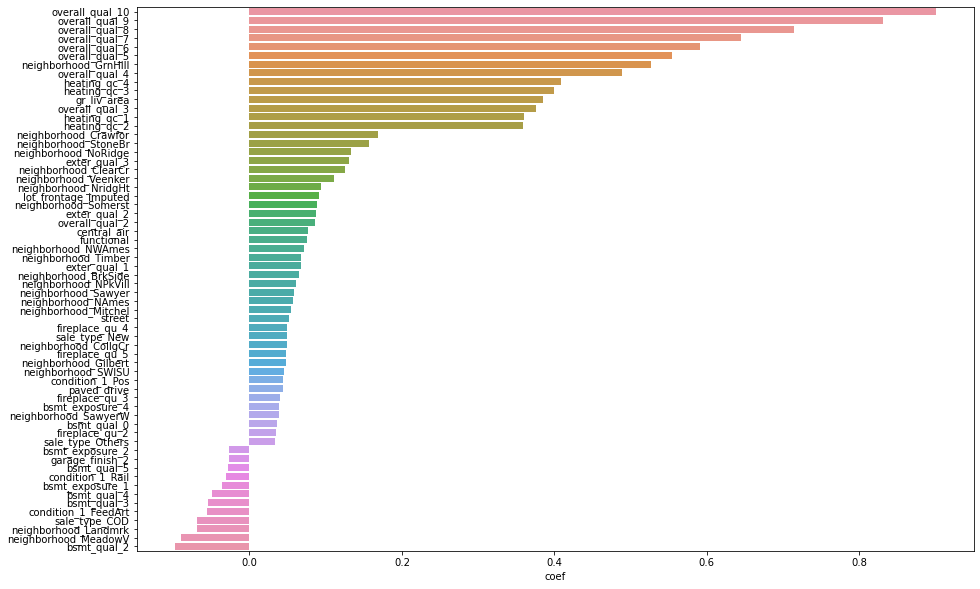

In [60]:
# Plot |coefficients| > 0.025
threshold = 0.025
lr_coef = pd.DataFrame(lr.coef_, index = X3.columns, columns = ["coef"])
lr_coef = lr_coef.loc[np.abs(lr_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lr_coef, x = "coef", y = lr_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 0.89 | 22,221 | 0.92 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |
| | | | | | | | | | |
| 8 | Standard regression | Same as Model 5, but ordinals are converted to dummies  | 0.88 | 21,365 | 0.92 | 23,421 | 33,353 | 5.94 ms | |

Performance is improved! I shall proceed to scale the remaining variables to see if Lasso and Ridge work better.

#### Lasso regression

In [61]:
# Apply standard scaler in order to fit Lasso and Ridge regressions later

# Less columns to scale now, as 7 ordinals have been transformed to dummies
# Reset numerical_cols according to X3
numerical_cols = X3_train.max() != 1

# Create X_train scaled variables and merge with dummies
numeric = X3_train.loc[: , numerical_cols]
dummy = X3_train.loc[: , -numerical_cols]

Z3_train = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.fit_transform(numeric), columns = numeric.columns),
    left_index = True,
    right_index = True
)


# Create X_test scaled variables and merge with dummies, 
# but fit on X_train parameters
numeric = X3_test.loc[: , numerical_cols]
dummy = X3_test.loc[: , -numerical_cols]

Z3_test = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.transform(numeric), columns = numeric.columns), # do not use fit_transform
    left_index = True,
    right_index = True
)




## For use on Kaggle competition set, create Z that is fitted and transformed on the full X set
numeric = X3.loc[: , numerical_cols]
dummy = X3.loc[: , -numerical_cols]

Z3 = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.fit_transform(numeric), columns = numeric.columns),
    left_index = True,
    right_index = True
)

# Use fitted scaler above to transform Kaggle competition set
numeric = X3_kaggle.loc[: , numerical_cols]
dummy = X3_kaggle.loc[: , -numerical_cols]

Z3_kaggle = pd.merge(
    left = dummy.reset_index(drop = True),
    right = pd.DataFrame(ss.transform(numeric), columns = numeric.columns), # do not use fit_transform
    left_index = True,
    right_index = True
)

In [62]:
# Instantiate
lasso = LassoCV(
    n_alphas = 500,
    cv = 5,
    random_state = 42
)

# Fit using scaled variables Z_train
%timeit lasso.fit(Z3_train, y2_train)

# Show optimal alpha
print(f'The optimal alpha for {lasso} is {lasso.alpha_:.5f}.')

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lasso,
    Z3_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The LassoCV's R2 on train set is {cv.mean():.3f}.")

# # Cross_val_score (RMSE) on train set
# cv = cross_val_score(
#     lasso,
#     Z_train2,
#     y_train2,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error'
# )
# print(f"The LassoCV's RMSE on train set is {cv.mean():.0f}.")

# Calc RMSE on train set
y_pred = np.exp(lasso.predict(Z3_train)) -1
print(f"The Lasso regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lasso.predict(Z3_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

363 ms ± 4.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The optimal alpha for LassoCV(cv=5, n_alphas=500, random_state=42) is 0.00030.
The LassoCV's R2 on train set is 0.880.
The Lasso regression's RMSE on train set is 21451.
The R2 on test set is 0.922.
The RMSE on test set is 23042.


In [63]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lasso.fit(Z3, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(lasso.predict(Z3_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_9.csv', index = False)

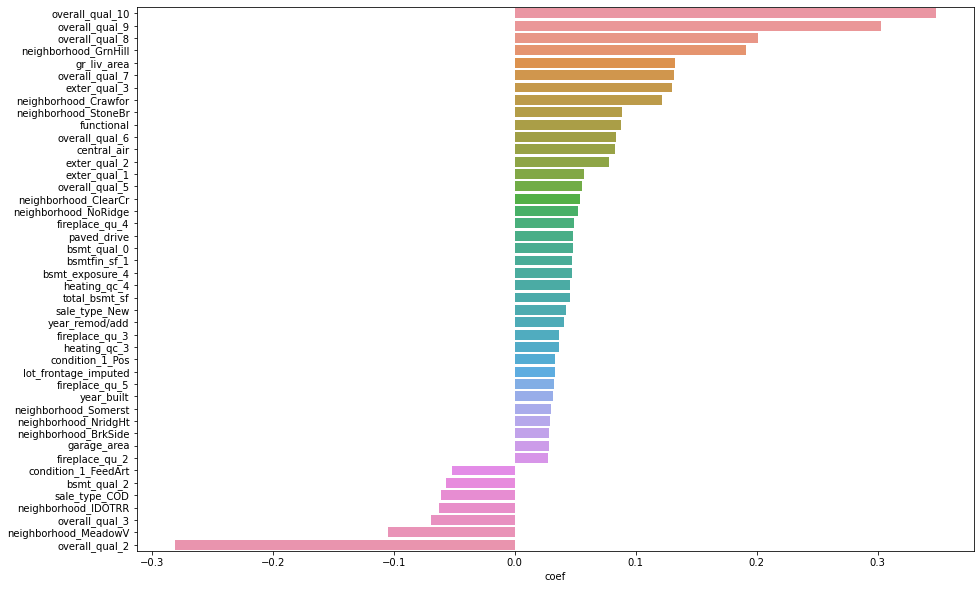

In [64]:
# Plot |coefficients| > 0.025
threshold = 0.025
lasso_coef = pd.DataFrame(lasso.coef_, index = Z3.columns, columns = ["coef"])
lasso_coef = lasso_coef.loc[np.abs(lasso_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lasso_coef, x = "coef", y = lasso_coef.index);

Update performance table

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 0.89 | 22,221 | 0.92 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |
| | | | | | | | | | |
| 8 | Standard regression | Same as Model 5, but ordinals are converted to dummies  | 0.880 | 21,365 | 0.920 | 23,421 | 33,353 | 5.94 ms | |
| 9 | Lasso regression | Same variables as Model 8, using its CV function to find optimal alpha  | 0.880 | 21,451 | 0.922 | 23,042 | 31,000 | 326 ms | Selected alpha is 0.00030 |

XXXXX

#### Ridge regression

In [65]:
# Instantiate
ridge = RidgeCV(
    alphas = np.logspace(-3,3,100),
    cv = 5
)

# Fit using scaled variables Z_train
%timeit ridge.fit(Z3_train, y2_train)

# Show optimal alpha
print(f'The optimal alpha for {ridge} is {ridge.alpha_:.3f}.')

# Cross_val_score (R2) on train set
cv = cross_val_score(
    ridge,
    Z3_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The RidgeCV's R2 on train set is {cv.mean():.3f}.")


# Calc RMSE on train set, since the cross_val_score output on log-saleprice can't be tweaked to reflect exp(log-saleprice)
y_pred = np.exp(ridge.predict(Z3_train)) -1
print(f"The Ridge regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(ridge.predict(Z3_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

2.19 s ± 45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The optimal alpha for RidgeCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       4.03701726e+01, 4.64158883e+01, 5.33669923e+01, 6.13590727e+01,
       7.05480231e+01, 8.11130831e+01, 9.32603347e+01, 1.07226722e+02,
       1.23284674e+02, 1.41747416e+02, 1.62975083e+02, 1.87381742e+02,
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        cv=5) is 1.630.
The RidgeCV's R2 on train set is 0.878.
The Ridge 

In [66]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
ridge.fit(Z3, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(ridge.predict(Z3_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_10.csv', index = False)

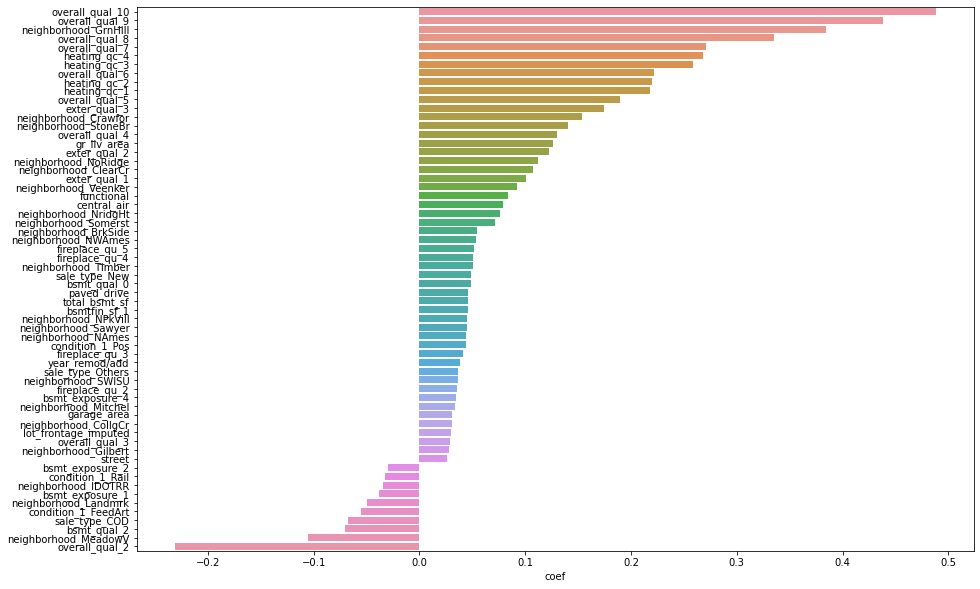

In [67]:
# Plot |coefficients| > 0.025
threshold = 0.025
ridge_coef = pd.DataFrame(ridge.coef_, index = Z3.columns, columns = ["coef"])
ridge_coef = ridge_coef.loc[np.abs(ridge_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = ridge_coef, x = "coef", y = ridge_coef.index);

Update performance table

| S/N | Model | Description | Number of columns incl dummies | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|-----------------------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 1 | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 59 | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 59 |0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 59 |0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 59 | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 59 |0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 59 |0.89 | 22,221 | 0.92 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |
| | | | | | | | | | |
| 8 | Standard regression | Same as Model 5, but ordinals are converted to dummies  | 85 |0.880 | 21,365 | 0.920 | 23,421 | 33,353 | 5.94 ms | |
| 9 | Lasso regression | Same variables as Model 8, using its CV function to find optimal alpha  | 85 |0.880 | 21,451 | 0.922 | 23,042 | 31,000 | 326 ms | Selected alpha is 0.00030 |
| 10 | Ridge regression | Same variables as Model 8, using its CV function to find optimal alpha | 85 |0.878 | 21,438 | 0.920 | 22,982 | 32,656 | 2.54 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.1630 |

Ridge regression seems to perform better than Lasso in the test set, but worse in the Kaggle competition set. Close  fight.

I have also added a new comparison metric called "Number of columns incl dummies" to show the extra complexity of Models 8-10 over Models 2-7. Any increase in complexity could make it harder for end-users to understand my model and it must be "compensated" by a reasonable increase in predictive capabilities, which I think is warranted in this case. 

### Interaction terms (on X4)

In [68]:
# Interaction only terms

poly = PolynomialFeatures(
    include_bias = False, #remove intercept term
    interaction_only = True,
) 

poly.fit(X3_train)

X4_train = poly.transform(X3_train)
X4_test = poly.transform(X3_test)
X4 = poly.transform(X3)
X4_kaggle = poly.transform(X3_kaggle)

In [69]:
X4_train.shape, X4_test.shape, X4.shape, X4_kaggle.shape

((1534, 3655), (512, 3655), (2046, 3655), (879, 3655))

It is generally a bad idea to do an indiscriminate polynomial-transform of variables, even if it is for interaction-only terms, as you will end up with thousands of features, which will lead to an overfitting scenario. It also makes for an extremely long runtime.

It is better to decide a priori what should be added as interaction terms using logic and understanding of how people price houses.


#### Standard regression (on X4)

In [70]:
# Instantiate model
lr = LinearRegression()

# Fit Model
%timeit lr.fit(X4_train, y2_train)

# Cross_val_score (R2) on train set
# cv = cross_val_score(
#     lr,
#     X4_train,
#     y2_train,
#     cv = 5,
#     scoring = 'r2'
# )
# print(f"The standard regression's R2 on train set is {cv.mean():.3f}.")
y_pred = np.exp(lr.predict(X4_train)) -1
print(f"The standard regression's R2 on train set is {r2_score(y_train, y_pred):.3f}.")
print(f"The standard regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lr.predict(X4_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
# Remember to re-transform the predicted log(prices) back to normal prices
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

995 ms ± 62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The standard regression's R2 on train set is 1.000.
The standard regression's RMSE on train set is 110.
The R2 on test set is -10367197333.699.
The RMSE on test set is 8425455891.


In [71]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lr.fit(X4, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(lr.predict(X4_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_11.csv', index = False)

Update performance table

| S/N | Model | Description | Number of columns incl dummies | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|-----------------------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 1 | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 59 | 0.89 | 25,808 | 0.89 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 59 |0.89 | 25,926 | 0.89 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 59 |0.89 | 25,907 | 0.89 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 59 | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 59 |0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 59 |0.89 | 22,221 | 0.92 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |
| | | | | | | | | | |
| 8 | Standard regression | Same as Model 5, but ordinals are converted to dummies  | 85 |0.880 | 21,365 | 0.920 | 23,421 | 33,353 | 5.94 ms | |
| 9 | Lasso regression | Same variables as Model 8, using its CV function to find optimal alpha  | 85 |0.880 | 21,451 | 0.922 | 23,042 | 31,000 | 326 ms | Selected alpha is 0.00030 |
| 10 | Ridge regression | Same variables as Model 8, using its CV function to find optimal alpha | 85 |0.878 | 21,438 | 0.920 | 22,982 | 32,656 | 2.54 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.1630 |
| | | | | | | | | | |
| 11 | Standard regression | Interaction terms on ALL variables in Model 8 (3655 features in total!)  | 3,655 | 1.000 | 110 | -10367197316 | 8425455884 | 129407287166325 x 10^45 | 992 ms | |

As mentioned above, Model 11 is just to confirm that it is generally a BAD idea to indiscriminately convert every X variables into interaction terms. While the R2 and RSME for the train set are near-perfect, the RSMEs for test set and Kaggle competition set are ludicrous, which is a clear sign of overfitting.

In [72]:
# Review column names again
X3_train.columns

Index(['street', 'neighborhood_Blmngtn', 'neighborhood_Blueste',
       'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
       'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
       'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill',
       'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
       'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker', 'condition_1_FeedArt', 'condition_1_Pos',
       'condition_1_Rail', 'mas_vnr_type_BrkFace', 'mas_vnr_type_Stone',
       'foundation', 'central_air', 'electrical', 'functional', 'paved_drive',
       'sale_type_COD', 'sale_type_New', 'sale_type_Others',
       'lot_frontage_impute

What might be more sensible is to perhaps look at a few variables that might be psychogically important to buyers. For example, if a house is new, the coefficients for gross living area and basement sqft might be higher than those for old houses, i.e. a buyer may think a larger built-up area for new houses is more valuable, because for old houses, they intend to tear down and rebuild so built-up area is not too important?

I shall proceed to try two interaction terms:
1. sale_type_New x gr_liv_area
2. sale_type_New x bsmtfin_sf_1


In [73]:
# Create new variables 
X4_train = X3_train
X4_test = X3_test
X4 = X3
X4_kaggle = X3_kaggle 

# Create interaction function for convenience later
def create_inter(data, term1, term2):
    newterm = term1 + 'X' + term2
    data[newterm] = data[term1] * data[term2]
    
## Ask TAs why X3 is affected when I only apply the function to X4?! How to fix it?
create_inter(X4_train, 'sale_type_New', 'gr_liv_area')
create_inter(X4_test, 'sale_type_New', 'gr_liv_area')
create_inter(X4, 'sale_type_New', 'gr_liv_area')
create_inter(X4_kaggle, 'sale_type_New', 'gr_liv_area')

In [74]:
# Check
X4_train[['sale_type_New', 'gr_liv_area', 'sale_type_NewXgr_liv_area']].describe()

,sale_type_New,gr_liv_area,sale_type_NewXgr_liv_area
count,1534.000000,1534.000000,1534.000000
mean,0.081486,7.258285,0.605800
std,0.273670,0.312498,2.035853
min,0.000000,6.175867,0.000000
25%,0.000000,7.038564,0.000000
50%,0.000000,7.274480,0.000000
75%,0.000000,7.449353,0.000000
max,1.000000,8.208764,8.128880


Interaction term looks right

In [75]:
# Instantiate model
lr = LinearRegression()

# Fit Model
%timeit lr.fit(X4_train, y2_train)

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lr,
    X4_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The standard regression's R2 on train set is {cv.mean():.3f}.")

# # Cross_val_score (RMSE) on train set
# cv = cross_val_score(
#     lr,
#     X_train2,
#     y_train2,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error'
# )
# print(f"The standard regression's RMSE on train set is {cv.mean():.0f}.")

# Cross_val_score can only calculate the RMSE on the transformed log-price, which gives
# a very miniscule RMSE since logs are small numbers. 
# No choice, use standard RMSE calculation on the entire train set
y_pred = np.exp(lr.predict(X4_train)) -1
print(f"The standard regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lr.predict(X4_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
# Remember to re-transform the predicted log(prices) back to normal prices
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

4.58 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The standard regression's R2 on train set is 0.881.
The standard regression's RMSE on train set is 21002.
The R2 on test set is 0.920.
The RMSE on test set is 23424.


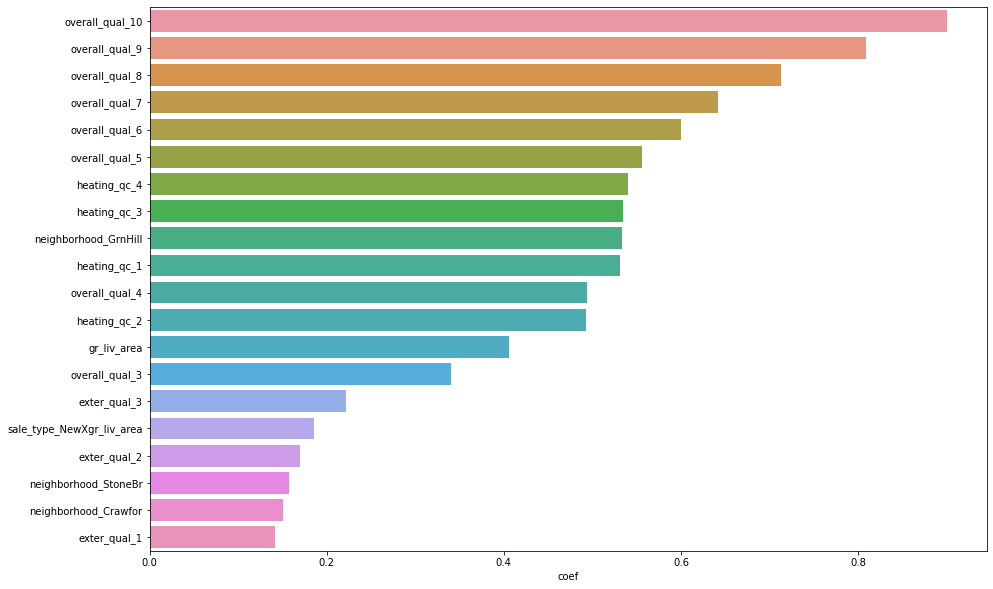

In [76]:
# Plot top few coefficients only

lr_coef = pd.DataFrame(lr.coef_, index = X4_train.columns, columns = ["coef"])
lr_coef = lr_coef.sort_values(by=['coef'], ascending = False).head(20)

plt.figure(figsize=(15,10))
sns.barplot(data = lr_coef, x = "coef", y = lr_coef.index);

It looks like the interaction term (sale_type_NewXgr_liv_area) is meaningfully added, as it appears in the top 15 ranking of coeffcients and its value is aproximately half that of the original term (gr_liv_area).

In [77]:
# Extract and interpret coefficients
pd.DataFrame(lr.coef_, index = X4_train.columns, columns = ["coef"]).loc[['gr_liv_area','sale_type_NewXgr_liv_area']]

,coef
gr_liv_area,0.406094
sale_type_NewXgr_liv_area,0.185317


Our suspicion is correct. The above coefficients mean that:
- For a non-new house, every unit increase in log(gr_live_area) increases the log(saleprice) by 0.376.
- For a new house, every unit increase in log(gr_live_area) increases the log(saleprice) by 0.376 + 0.171 = 0.547.

In [78]:
0.376 + 0.171

0.547

However, our new variable only results in a marginal improvement in test scores. Let's try out a fuller set of interaction terms as follow:
- sale_type_New x gr_live_area
- overall_qual x gr_live_area
- neighborhood x gr_live_area

Using a similar logic, this means that the newer the house or the higher quality a house is or in certain highly-desriable neighborhoods, a buyer is willing to pay more per sqft of gross living area.

In [79]:
# Create fuller set of interaction terms

# Copy-paste from X3.columns
to_convert = ['neighborhood_Blmngtn', 'neighborhood_Blueste',
               'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr',
               'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
               'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill',
               'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV',
               'neighborhood_Mitchel', 'neighborhood_NAmes', 'neighborhood_NPkVill',
               'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt',
               'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
               'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
               'neighborhood_Veenker',
              'overall_qual_2', 'overall_qual_3', 'overall_qual_4', 
              'overall_qual_5', 'overall_qual_6', 'overall_qual_7', 
              'overall_qual_8', 'overall_qual_9', 'overall_qual_10',
              'sale_type_New']

for _ in to_convert:
    create_inter(X4_train,_, 'gr_liv_area')
    create_inter(X4_test,_, 'gr_liv_area')
    create_inter(X4,_, 'gr_liv_area')
    create_inter(X4_kaggle,_, 'gr_liv_area')
## Ask TAs why X3 is affected when I only apply the function to X4?! How to fix it?

In [80]:
len(to_convert)

37

In [81]:
# Check: i should see 37 additional columns in X4 over X3
X4_train.shape, X4_test.shape, X4.shape, X4_kaggle.shape

((1534, 122), (512, 122), (2046, 122), (879, 122))

In [82]:
# Instantiate model
lr = LinearRegression()

# Fit Model
%timeit lr.fit(X4_train, y2_train)

# Cross_val_score (R2) on train set
cv = cross_val_score(
    lr,
    X4_train,
    y2_train,
    cv = 5,
    scoring = 'r2'
)
print(f"The standard regression's R2 on train set is {cv.mean():.3f}.")

# # Cross_val_score (RMSE) on train set
# cv = cross_val_score(
#     lr,
#     X_train2,
#     y_train2,
#     cv = 5,
#     scoring = 'neg_root_mean_squared_error'
# )
# print(f"The standard regression's RMSE on train set is {cv.mean():.0f}.")

# Cross_val_score can only calculate the RMSE on the transformed log-price, which gives
# a very miniscule RMSE since logs are small numbers. 
# No choice, use standard RMSE calculation on the entire train set
y_pred = np.exp(lr.predict(X4_train)) -1
print(f"The standard regression's RMSE on train set is {np.sqrt(mean_squared_error(y_train, y_pred)):.0f}.")

# R2 on test set
y_pred = np.exp(lr.predict(X4_test)) -1
print(f'The R2 on test set is {r2_score(y_test, y_pred):.3f}.')

# RMSE on test set
# Remember to re-transform the predicted log(prices) back to normal prices
print(f'The RMSE on test set is {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}.')

6.48 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The standard regression's R2 on train set is 0.809.
The standard regression's RMSE on train set is 19582.
The R2 on test set is 0.918.
The RMSE on test set is 23683.


In [83]:
# Submit Kaggle competition set

# Fit model on combined train and test sets
lr.fit(X4, y2)

# Predict sale prices based on Kaggle competition set
y_pred = np.exp(lr.predict(X4_kaggle)) -1
sub_reg['SalePrice'] = y_pred
sub_reg.to_csv('../datasets/model_12.csv', index = False)

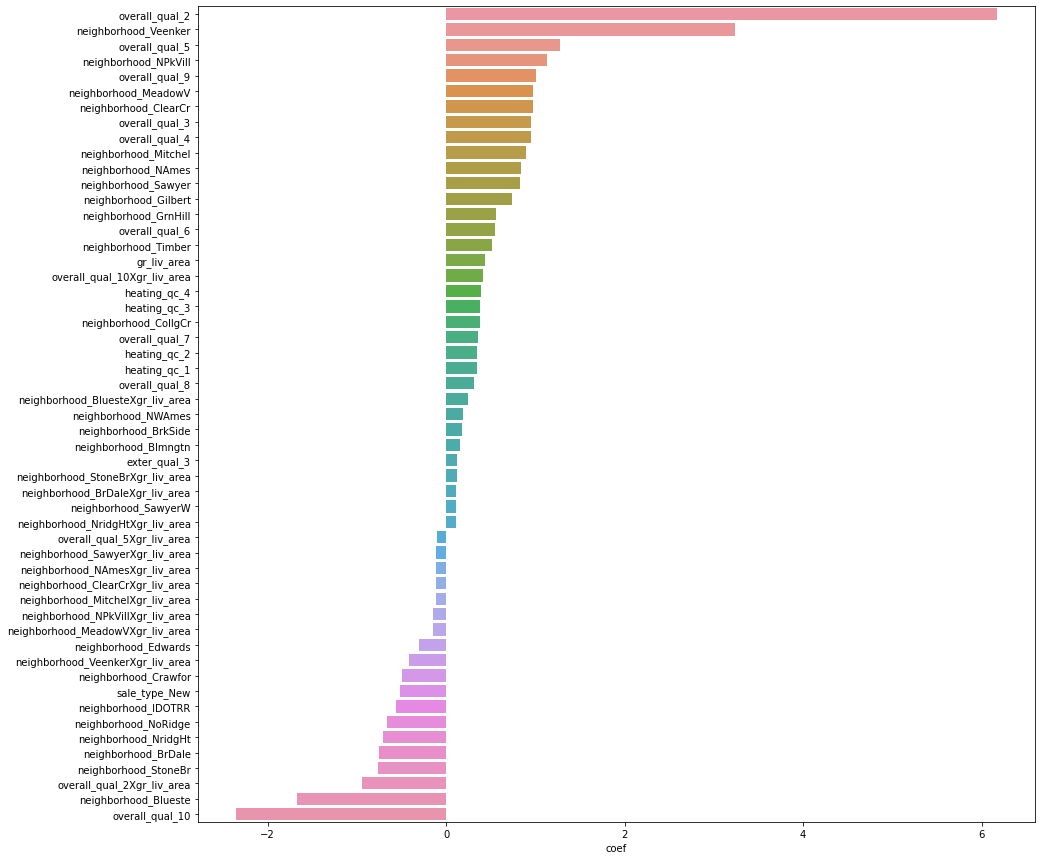

In [84]:
# Plot |coefficients| > 0.1
threshold = 0.1
lr_coef = pd.DataFrame(lr.coef_, index = X4.columns, columns = ["coef"])
lr_coef = lr_coef.loc[np.abs(lr_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,15))
sns.barplot(data = lr_coef, x = "coef", y = lr_coef.index);

Update performance table

| S/N | Model | Description | Number of columns incl dummies | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|-----------------------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 1 | Baseline | Use the mean of train set's sale prices as predictor | 1 | 0.00 | 78,017 | -0.00 | 82,756 | 83,691 | 33 µs | The mean sales price is $181,591 |
| | | | | | | | | | |
| 2 | Standard regression | OLS on the 28 chosen variables | 59 | 0.890 | 25,808 | 0.893 | 27,012 | 35,820 | 4.81 ms | |
| 3| Lasso regression | Same variables as above, using its CV function to find optimal alpha | 59 |0.889 | 25,926 | 0.893 | 27,127 | 32,049 | 245 ms | Selected alpha is 62.7 |
| 4 | Ridge regression | Same variables as above, using its CV function to find optimal alpha | 59 |0.889 | 25,907 | 0.894 | 27,005 | 35,332 | 2.34 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.132 |
| | | | | | | | | | |
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 59 | 0.890 | 22,219 | 0.916 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 59 |0.888 | 22,445 | 0.916 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 59 |0.890 | 22,221 | 0.916 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |
| | | | | | | | | | |
| 8 | Standard regression | Same as Model 5, but ordinals are converted to dummies  | 85 |0.880 | 21,365 | 0.920 | 23,421 | 33,353 | 5.94 ms | |
| 9 | Lasso regression | Same variables as Model 8, using its CV function to find optimal alpha  | 85 |0.880 | 21,451 | 0.922 | 23,042 | 31,000 | 326 ms | Selected alpha is 0.00030 |
| 10 | Ridge regression | Same variables as Model 8, using its CV function to find optimal alpha | 85 |0.878 | 21,438 | 0.920 | 22,982 | 32,656 | 2.54 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.1630 |
| | | | | | | | | | |
| 11 | Standard regression | Interaction terms on ALL variables in Model 8 (3655 features in total!)  | 3,655 | 1.000 | 110 | -10367197316 | 8425455884 | 129407287166325 x 10^45 | 992 ms | |
| 12 | Standard regression | Interaction terms on New House x Gross Living Area, plus Various Quality Levels x Gross Living Area  | 122 | 0.809 | 19,582 | 0.918 | 23,683| 194,050 | 9.25 ms| |


__Summary__

Model 11 shows the lunacy of using too many interaction terms (unbounded RMSEs), but Model 12 shows the danger of using even just a handle of interaction terms (10 additional). At first glance, it looks promising as both train and test RMSEs are in line (or slightly better) compared to Models 8 and 5. However, its Kaggle RMSE is totally off the chart. 

Upon further investigation, I realise that the Kaggle competition test mostly have houses that have gross living areas that are much smaller than my train/test sets, and my predicted Kaggle values between Model 12 and Model 8 deviate quite a lot on those small houses. This means that Model 12 probably fitted too heavily on neighborhood features that are based on a sample set with large average house sizes, and when it tries to apply those estimated parameters on small houses, the prediction is totally off because interaction terms amplify errors when the variables are multiplied.

I thought about using Model 11.5 (which is the trial model that uses one additional interaction term only:  sale_type_New x gr_live_area), so the risk of overfitting is lower than Model 12. It has just a slightly better train set RMSE than Model 8 (21,002 vs 21,365) and an equivalent test set RMSE as Model 8 (23,424 vs 23,421). 

However, given the danger we saw with using interact terms in Model 12 and the fact that Model 11.5 has almost similar RMSEs as Model 8, it is probably prudent to go with a simpler model, i.e. one that does not use interaction terms at all.

I guess this marks the end of our interaction-term adventure, with no need to go on to Lasso and Ridge regressions, as the same fundamental issue with fitting on multiplied terms on vastly different data sets (train/set vs Kaggle competition set) will be present.

## Model selection

### Between Models 5-7 & Models 8-10

In [85]:
# Models 5-7
print(f"Average R2 on train/test set = {(0.890 + 0.888 + 0.890 + 0.916 + 0.916 + 0.916)/6:.3f}")
print(f"Average RMSE on train set = {(22219 + 22445 + 22221)/3:.0f}")
print(f"Average RMSE on test set = {(23963 + 23941 + 23953)/3:.0f}")
print(f"Average R2 on Kaggle competition set = {(34139 + 29936 + 33944)/3:.0f}")

Average R2 on train/test set = 0.903
Average RMSE on train set = 22295
Average RMSE on test set = 23952
Average R2 on Kaggle competition set = 32673


In [86]:
# Models 8-10
print(f"Average R2 on train/test set = {(0.880 + 0.880 + 0.878 + 0.920 + 0.922 + 0.920)/6:.3f}")
print(f"Average RMSE on train set = {(21365 + 21451 + 21438)/3:.0f}")
print(f"Average RMSE on test set = {(23421 + 23042 + 22982)/3:.0f}")
print(f"Average R2 on Kaggle competition set = {(33353 + 31000 + 32656)/3:.0f}")

Average R2 on train/test set = 0.900
Average RMSE on train set = 21418
Average RMSE on test set = 23148
Average R2 on Kaggle competition set = 32336


In [87]:
21418/22295-1, 23148/23952-1, 32336/32673-1

(-0.03933617403005163, -0.03356713426853708, -0.01031432681418909)

We now evaluate two distinct sets of models:
1. Models 5-7, fitted on 28 cleaned variables, with categorical variables such as neighborhood, mas_vnr_type and sale_type converted into dummies, and continuous variables such as saleprice and gr_liv_area tranformed by the natural logarithm or square root function 
    - 59 columns in total
2. Model 8-10, same transformations as Models 5-7, plus ordinal variables such as overall_qual and exter_qual converted to dummies 
    - 85 columns in total
    
Evaluation criteria:
1. RMSE: On average, Models 8-10 have practically the same average R2s as Models 5-7 (0.900 vs 0.903). This shows why R2s are typically not used by data scientists these days. On average, the RMSEs for Models 8-10 are lower than Models 5-7 (21418 vs 22295 for train set, 23148 vs 22295 for test set, 32336 vs 32673 for Kaggle competition set). In percentage terms, the average RMSEs are 3.9%, 3.4% and 1.0% lower respectively.
2. Complexity: Models 8-10 are definitely more complex than Model 5-7 (85 columns vs 59 columns). This increases the risk of overfitting, and this could be possibly why Model 8-10's overperformance drop as we progress from train set (3.9%) to test set (3.4%) to Kaggle competition set (1.0%).  
3. Coefficients: Ultimately, we need to be able to explain our model to clients so that they can feel that it can be trusted. In the images below, I show all coefficients from Model 6 and Model 9 that are more than 0.025 or less than -0.025. 
    - One can see that it is simpler to explain Model 6 than Model 9. For example, it is east to explain "Every increase in overall quality rating implies an approximately 10% increase in price, all else equal" (Model 6), than telling a client "A house with an overall quality rating of 7 is expected to have a 15% higher price than one with a rating of 1 (which is the baseline dummy)". Client might reply "I don't understand what the quality difference is between level 1 and level 7."
    - While one may criticise Models 5-7's ordinal variables for assuming an equal "distance" between each quality level, one may also criticise Models 8-10 for being overly-assuming regarding "distances" between each quality level. For example, a client may question Model 6 saying "Why is the gap between quality levels 9 and 10 so narrow, and so wide between levels 8 and 9? It doesn't make sense to me as that is not how I would rate houses. What gives me the confidence to trust that your assumptions are correct?"
    - In addition, the client may question the logicality of overall quality levels 3 and 2 predicting prices that are lower than level 1 (-7% and -28% respectively). While that is what the data says, it can lead to a loss of confidence in the model by the client.
4. Stability of model: I wonder if it makes sense to test the stability of my estimated coefficients for both sets of models, in addition to RMSEs that I have already generated. For example, I would combine my train+test sets into one again, randomly split into 50/50, and fit parameters for both of them. If the estimated coefficients are roughly the same for Models 5-7 for both equally-sized sets, but wildly different for Models 8-10, then the latter can't be trusted as much as the results aren't "stable". As an illustration, I conduct the test for Model 6 vs 9 below.
5. Run time: A small consideration here, but run times for Models 5-7 are faster than their counterparts in Models 8-10.

Conclusion:
All things considered, I will prefer Models 5-7 over Models 8-10, as it is simplier to explain to my clients, there is less chance of overfitting, the runtime is faster, and its RMSE is only 1-3% less than that of Models 8-10.

Coefficients of Model 6
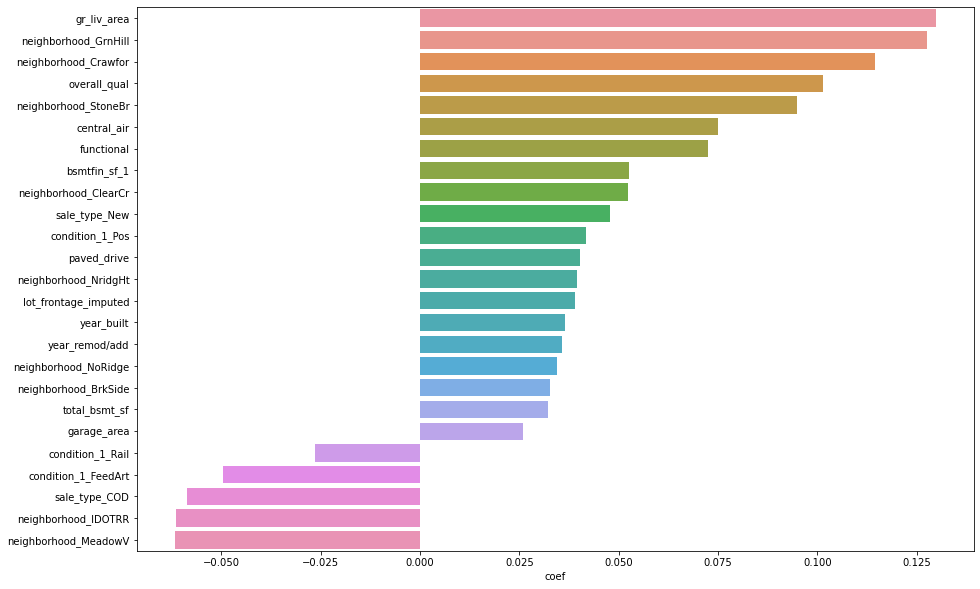

Coefficients of Model 9
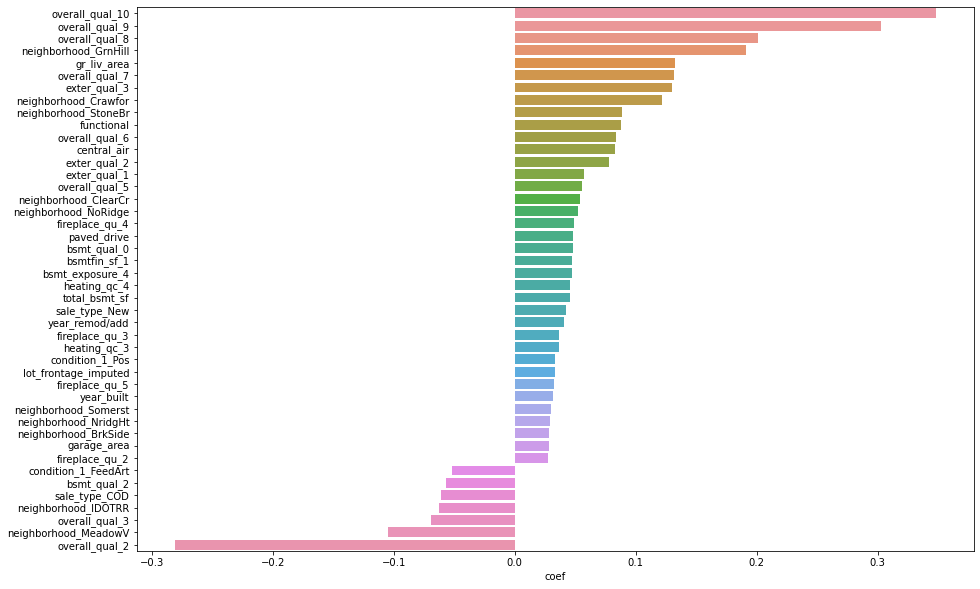

### Between Model 5, 6 or 7

I reprint the performance metric of Models 5-7. I choose Lasso regression (Model 6) for two main reasons:
- Lasso set has fewer non-zero coefficients, which makes it easier to explain to clients.
- Lasso has lower RMSEs than Ridge and standard OLS for the test set and Kagel competition set.

| S/N | Model | Description | R2 (train) |  RMSE (train) | R2 (test) |  RMSE (test) | RMSE (Kaggle) |Runtime | Remarks |
|-----|-------|-------------|------------|---------------|-----------|--------------|---------------|--------|---------|
| 5 | Standard regression | Selected variables, including sale price, are log- and sqrt- transformed | 0.89 | 22,219 | 0.92 | 23,963 | 34,139 | 3.71 ms | |
| 6 | Lasso regression | Same variables as Model 5, using its CV function to find optimal alpha  | 0.89 | 22,445 | 0.92 | 23,941 | 29,936 | 219 ms | Selected alpha is 0.00034 |
| 7 | Ridge regression | Same variables as Model 5, using its CV function to find optimal alpha | 0.89 | 22,221 | 0.92 | 23,953 | 33,944 | 2.17 s | Set alpha range to be between 0.001 to 1000, selected alpha is 0.152 |

In [145]:
# Count numnber of non-zero coefficients for Lasso
print(f"The number of non-zero coefficients for Model 5 is {(lr.fit(Z2, y2).coef_ != 0).sum()}.")
print(f"The number of non-zero coefficients for Model 6 is {(lasso.fit(Z2, y2).coef_ != 0).sum()}.")
print(f"The number of non-zero coefficients for Model 7 is {(ridge.fit(Z2, y2).coef_ != 0).sum()}.")

The number of non-zero coefficients for Model 5 is 59.
The number of non-zero coefficients for Model 6 is 48.
The number of non-zero coefficients for Model 7 is 59.


## Conclusions

174 ms ± 866 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


,coef
gr_liv_area,0.129736
neighborhood_GrnHill,0.127519
neighborhood_Crawfor,0.114540
overall_qual,0.101315
neighborhood_StoneBr,0.094912
central_air,0.074915
functional,0.072505
bsmtfin_sf_1,0.052663
neighborhood_ClearCr,0.052255
sale_type_New,0.047756


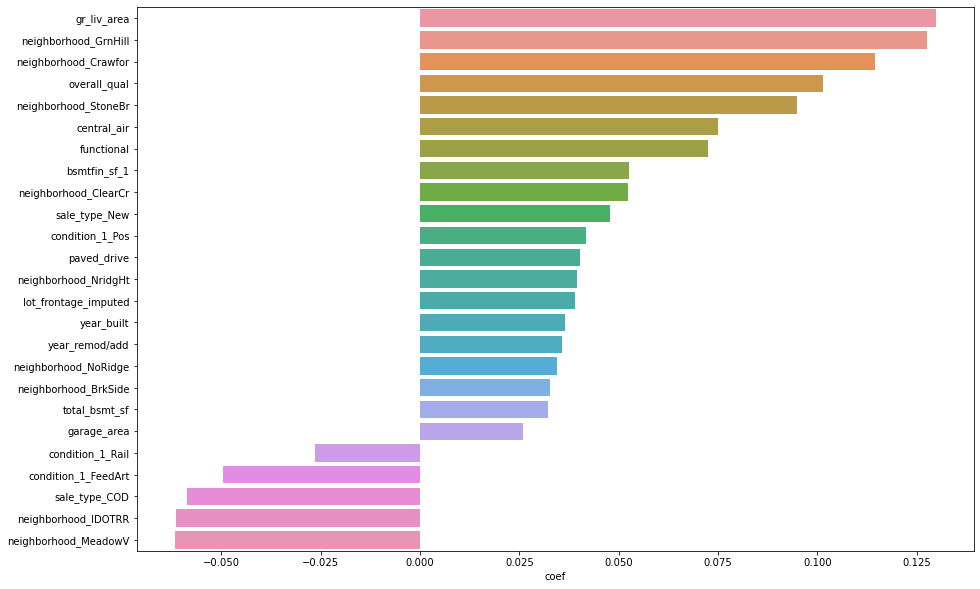

In [147]:
# Instantiate
lasso = LassoCV(
    n_alphas = 500,
    cv = 5,
    random_state = 42
)

# Fit using scaled variables Z_train
%timeit lasso.fit(Z2, y2)

# Plot |coefficients| > 0.025
threshold = 0.025
lasso_coef = pd.DataFrame(lasso.coef_, index = Z2.columns, columns = ["coef"])
lasso_coef = lasso_coef.loc[np.abs(lasso_coef.coef) > threshold, :].sort_values(by=['coef'], ascending = False)

plt.figure(figsize=(15,10))
sns.barplot(data = lasso_coef, x = "coef", y = lasso_coef.index);

display(lasso_coef)

Factors for homebuyers to consider:
1. Neighborhood - Gross living area is the biggest predictor of housing prices but that is not interesting to home buyers. This is an expected variable. The next biggest predictor would be neighborhood locations. GrmHill and Crawfor are the next most important factors in a buyer's mind, above factors such as overall quality of house or availability of central air conditioning. MeadowV and IDOTRR are the most undesirable factors. For instance, a house in GrmHill and Crawfor is expected to be priced 12.7% and 11.5% more than one in OldTown, while one in MeadowV and IDOTRR is expected to be priced 6.2% and -6.1% below one in OldTown.
2. Overall quality of house - For every increase in quality rating, a house price is expected to increase by 10.1%, all else equal.
3. Air conditioning - A house with central air con is expected to be worth 7.5% more than a house without, all else equal. 
4. Functionality - A house with typical functionality is expected to be worth 7.3% more than a house without, all else equal.

Negatives:
1. Sale type COD: A house that is being sold under court order is expected to be priced 5.9% below one that is sold under standard mortgage terms.
2. Condition types: It is bad to live near negative features. A house that is situated near to feeder roads and arteries is expected to be priced 5.0% below one that does not have any positive or negative external features in the vicinity. A house that is situated near a railroad is expected to be priced 2.7% below one that does not have any positive or negative external features in the vicinity.

## Recommendations

Considerations for buyers looking to purchase a house in Ames
- Ideal neighbourhoods to purchase homes are Green Hills and Crawford, and the worst are Meadow Village and Iowa DOT and Rail Road.
- Making sure the home has central air conditioning.
- Making sure the home is functional (heating, flowing taps, etc), as anything deemed non-functional will be priced 7% less. 


